## First overview
Guided by the Notebook of Ali Sultanov for [Customer Personality Analysis](https://www.kaggle.com/code/alisultanov/clustering-customer-personality-analysis/notebook) for wines.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from datetime import datetime
import warnings
import sys
import os
from ProjetSpectralClustering import *

In [2]:
# Data set from https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download
data = pd.read_csv("../SpectralClustering/CC_dataset.csv")
data.head(10)
# Installments_purchases amount of a purchase paid in installments (regular rates)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [3]:
del data["CUST_ID"]
data.isna().sum() # shows amount of NA in all variables
data.dropna(inplace=True) # removes observations with NA
data.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


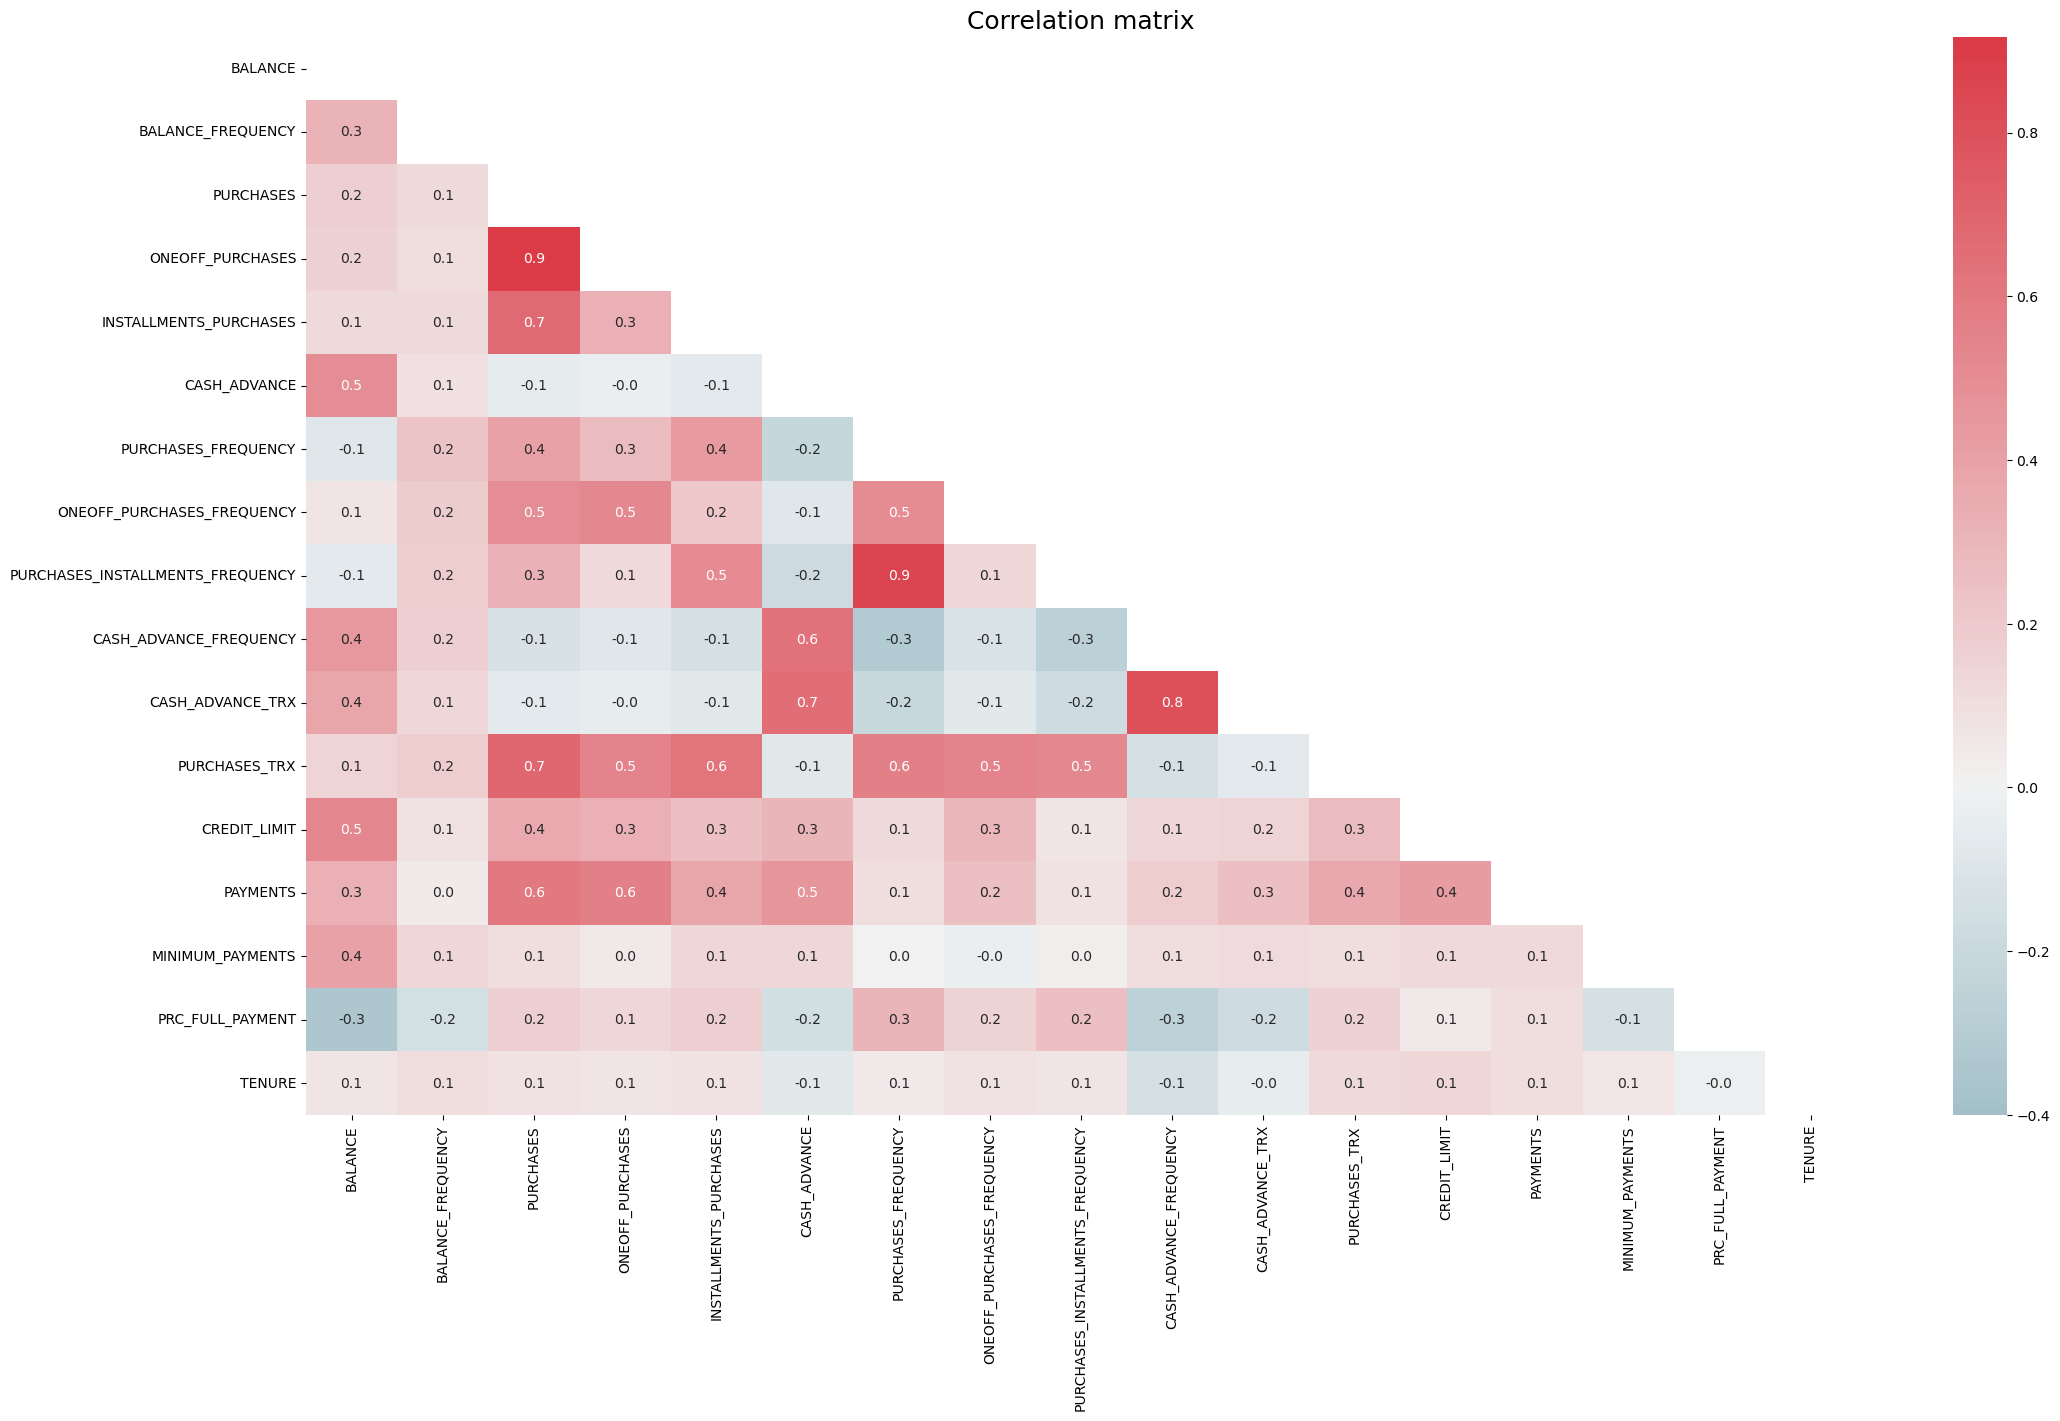

In [4]:
to_corr = list(data.columns)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # uses seaborn package
matrix = np.triu(data[to_corr].corr()) # creates upper triangle matrix
plt.figure(figsize=(25, 14))
plt.title('Correlation matrix', fontsize=18)
sns.heatmap(data[to_corr].corr(), annot=True,
            fmt='.1f', vmin=-0.4, center=-0, cmap=cmap, mask=matrix)
plt.show()

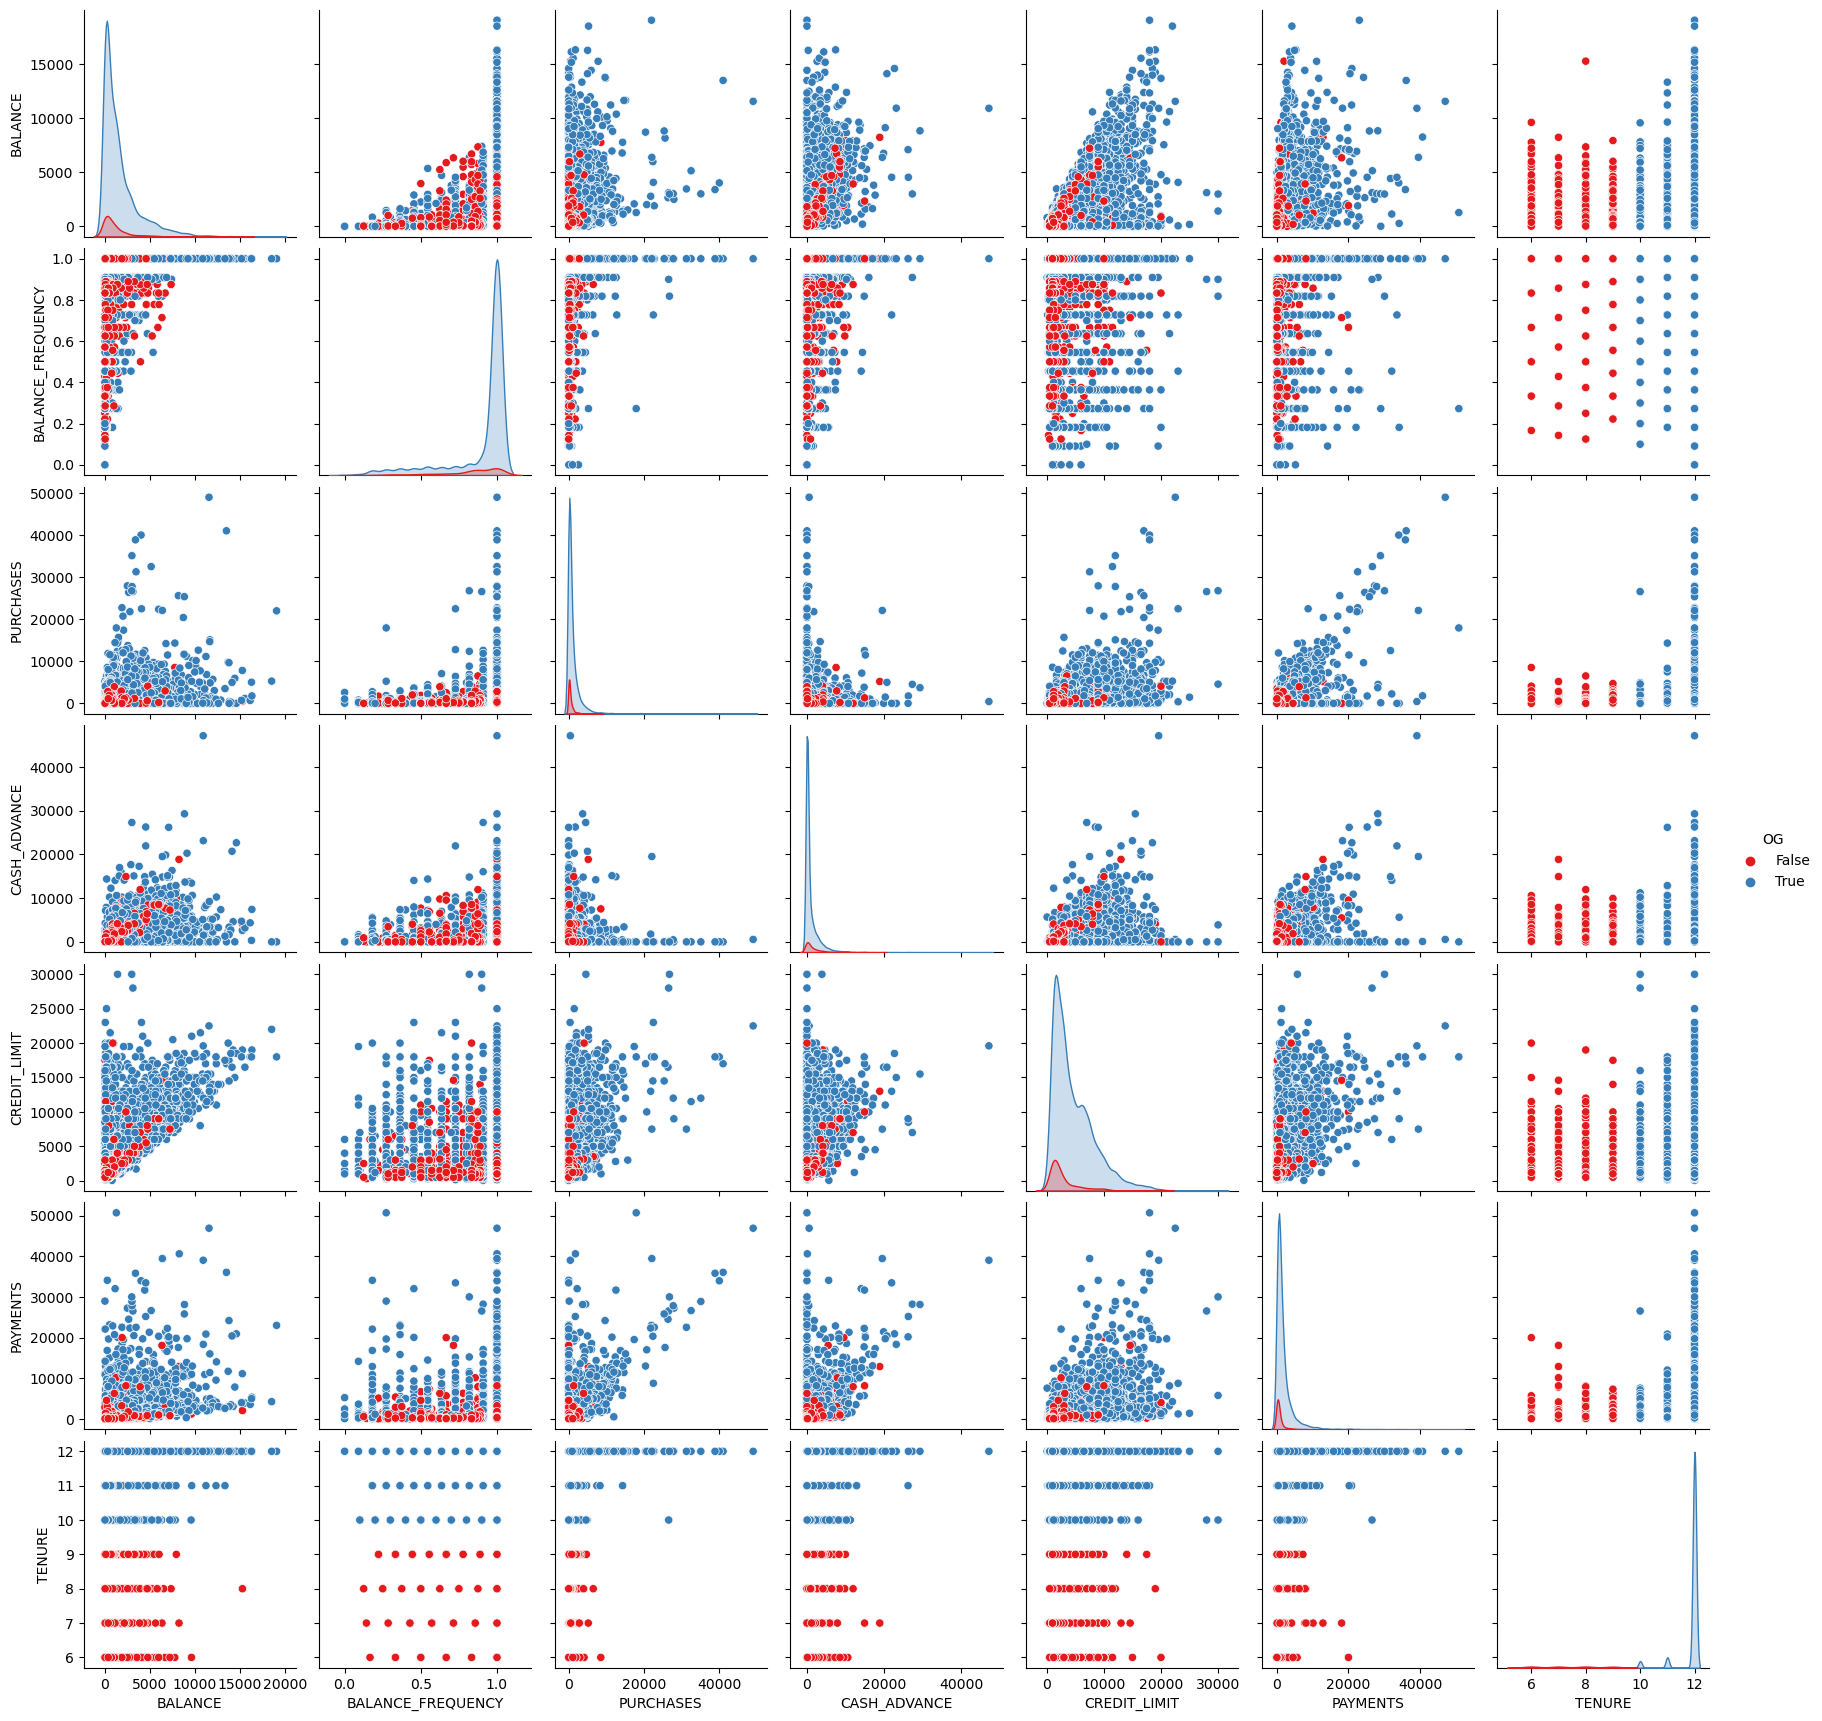

In [5]:
data.TENURE.unique() # Different tenure values
data["OG"] = data["TENURE"] > (np.min(data["TENURE"]) + np.max(data["TENURE"]))/2 # differ between old and new customers
to_plot = ["BALANCE", "BALANCE_FREQUENCY", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS","TENURE", "OG"]
sns.pairplot(data[to_plot], hue="OG", palette='Set1')
plt.show()

In [6]:
# imported from https://www.kaggle.com/code/alisultanov/clustering-customer-personality-analysis/notebook
def scaling_func(df: pd.DataFrame) -> None:
    mms = MinMaxScaler() # from sklearn.prepocessing
    return pd.DataFrame(data=mms.fit_transform(df), columns=df.columns)


data_scaled = scaling_func(data)
data_scaled.index = data.index  # for convenient work with dataframes

In [7]:
def dim_reduction(data: pd.DataFrame) -> pd.DataFrame:
    n_components = 8
    pca = PCA(n_components=n_components, random_state=42)
    data = pd.DataFrame(pca.fit_transform(data), columns =([f'PC{i}' for i in range(1, n_components + 1)]))
    return data

data_transform = dim_reduction(data_scaled)  # df: scaling + dimensionality reduction
data_transform.index = data_scaled.index  # for convenient work with dataframes

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


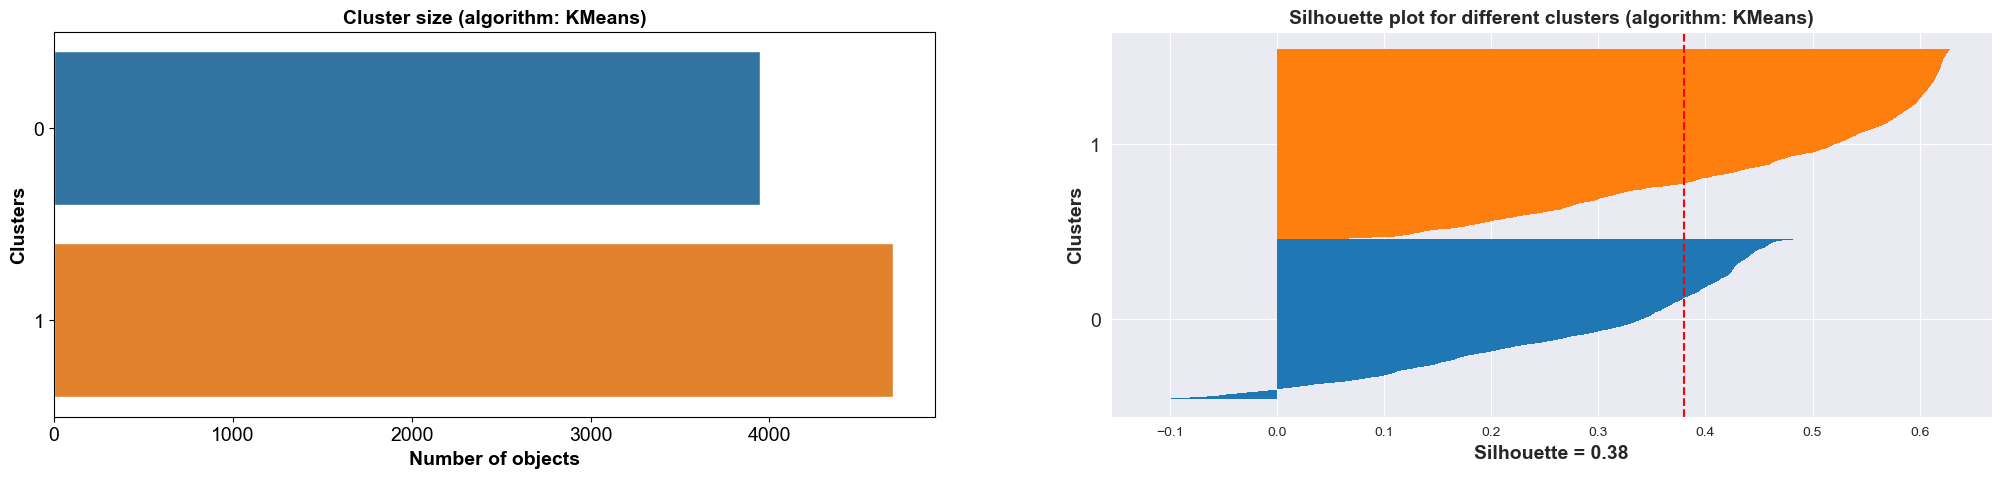

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


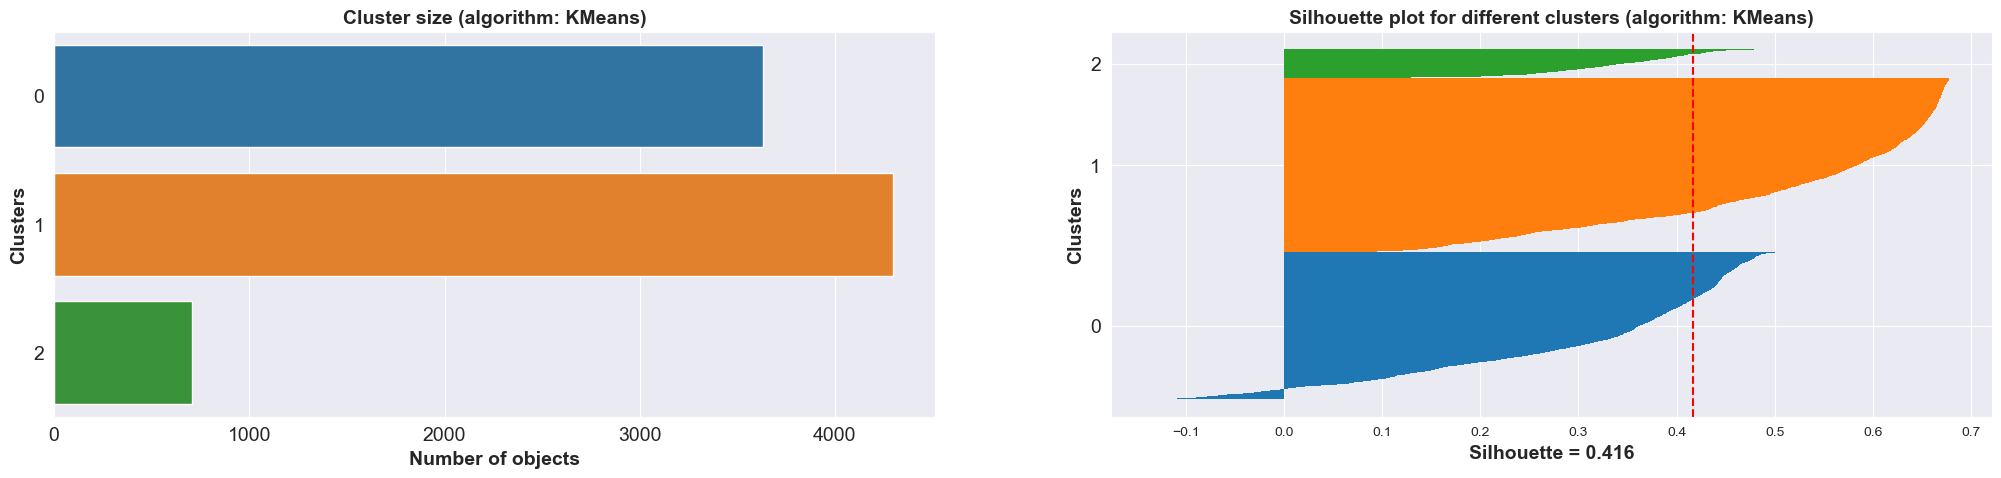

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


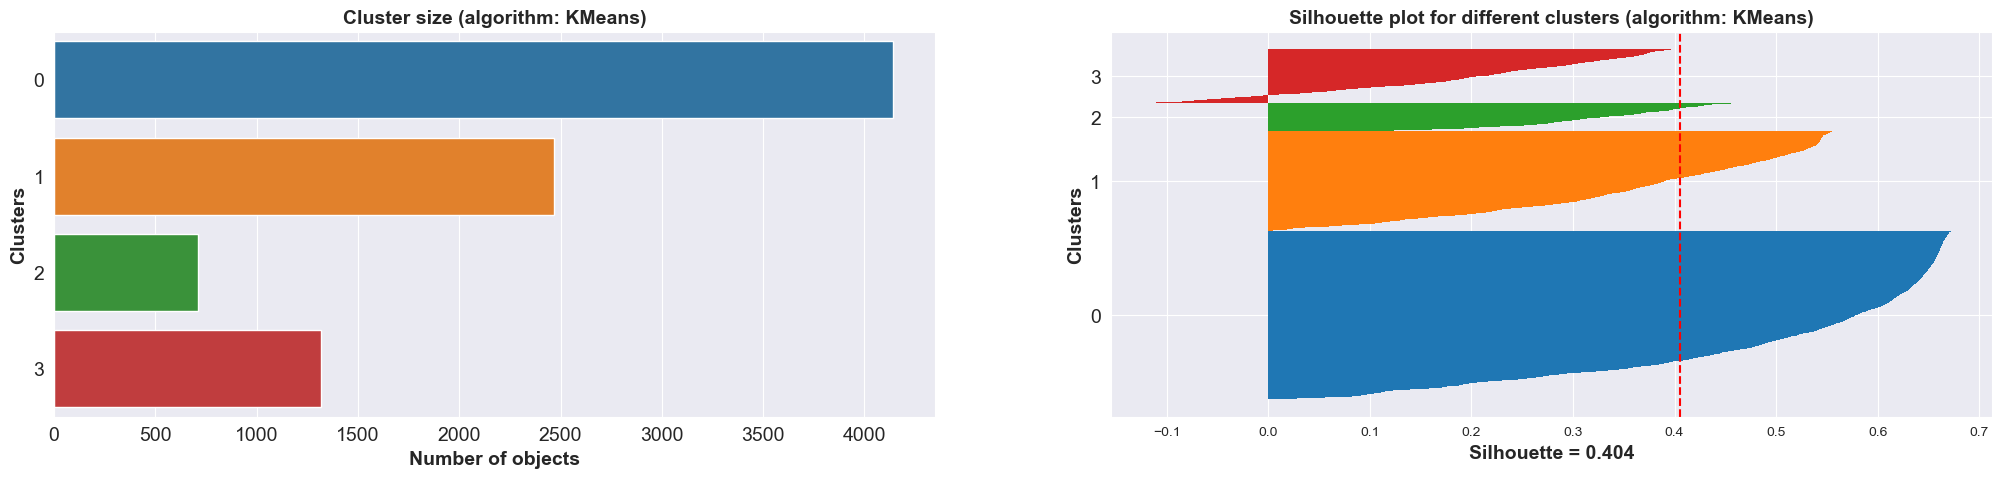

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


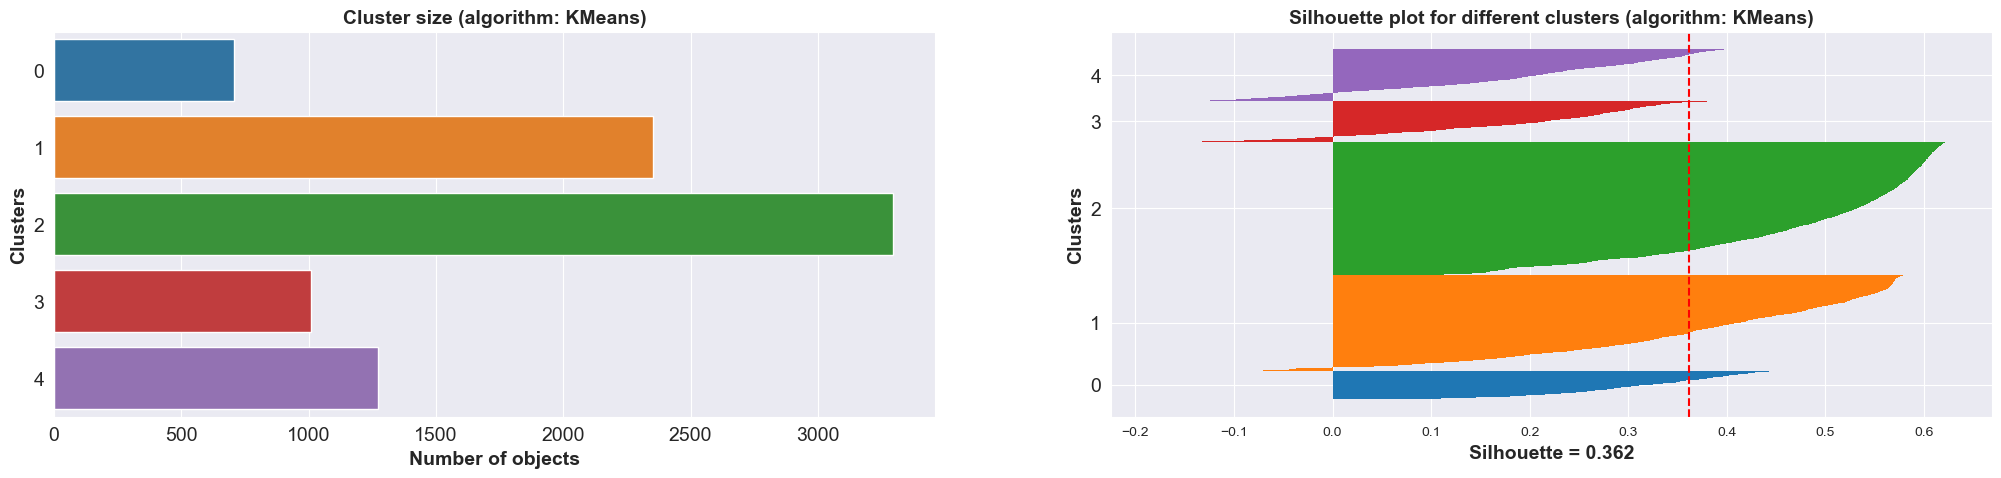

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


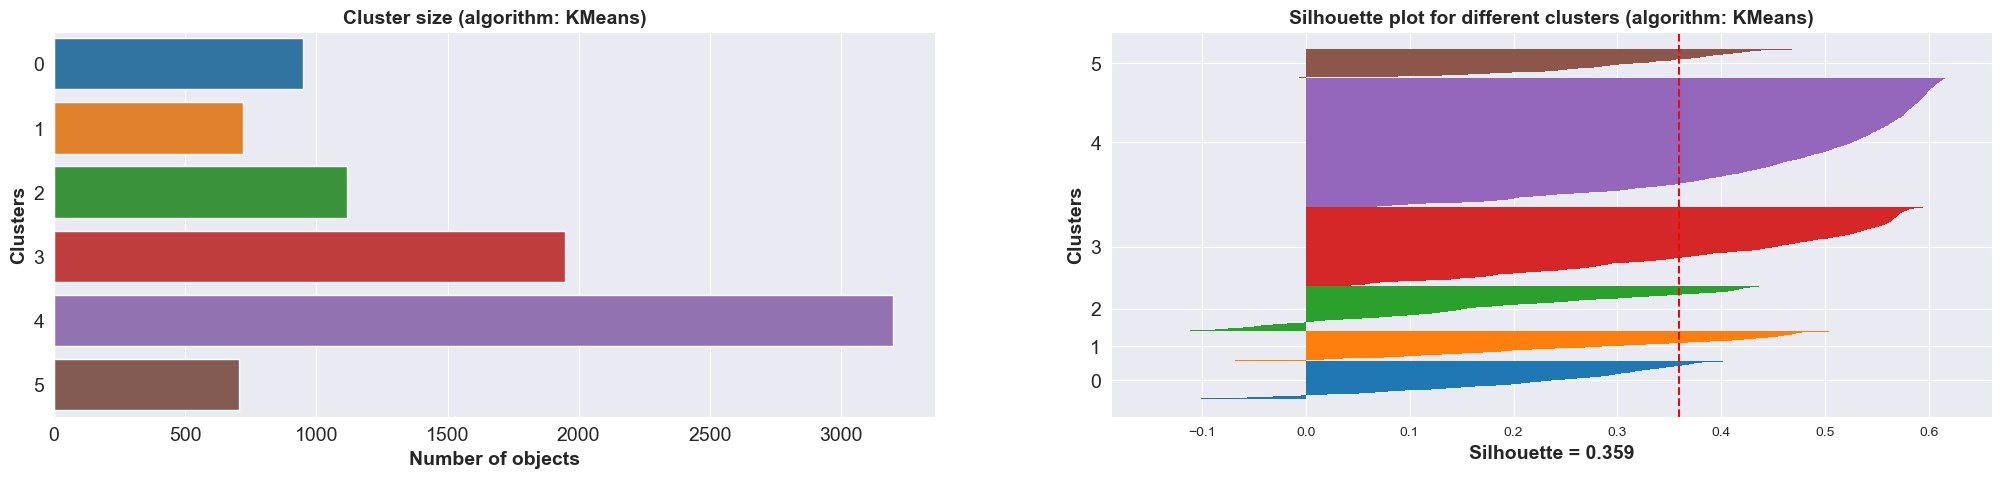

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


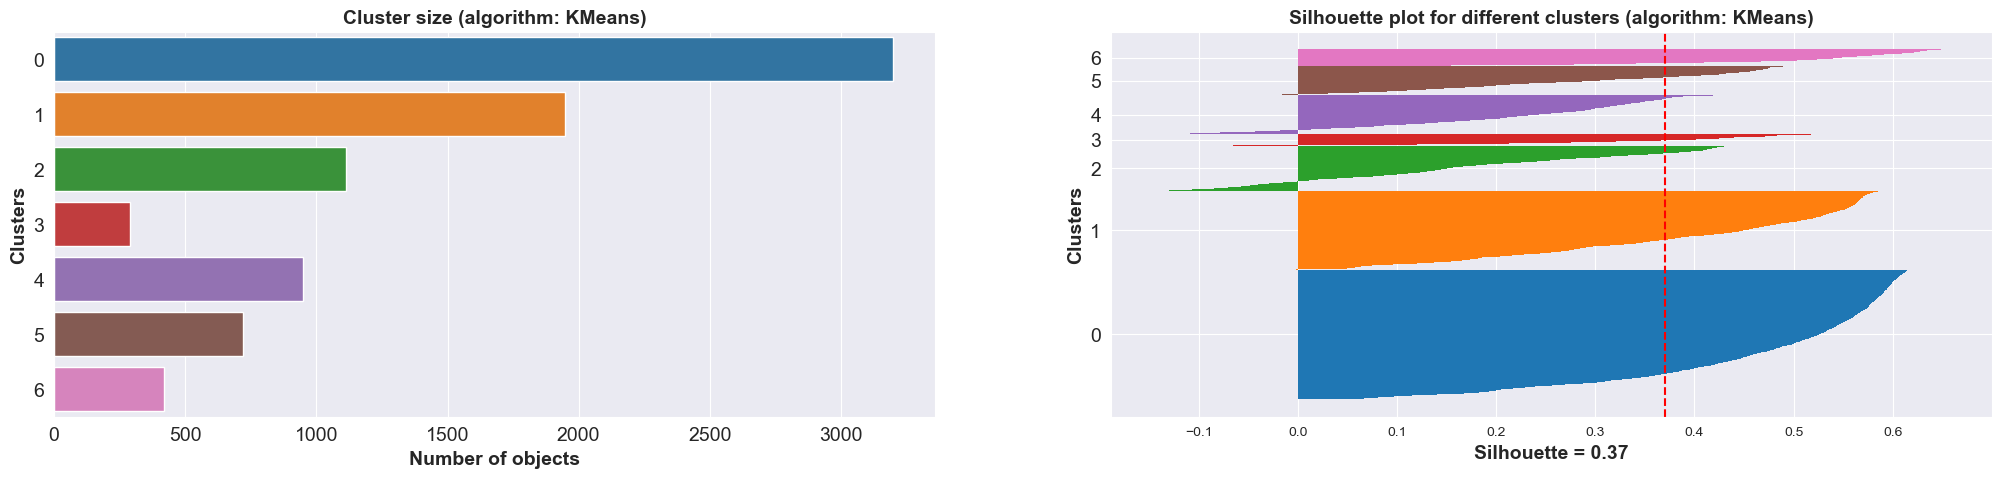

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


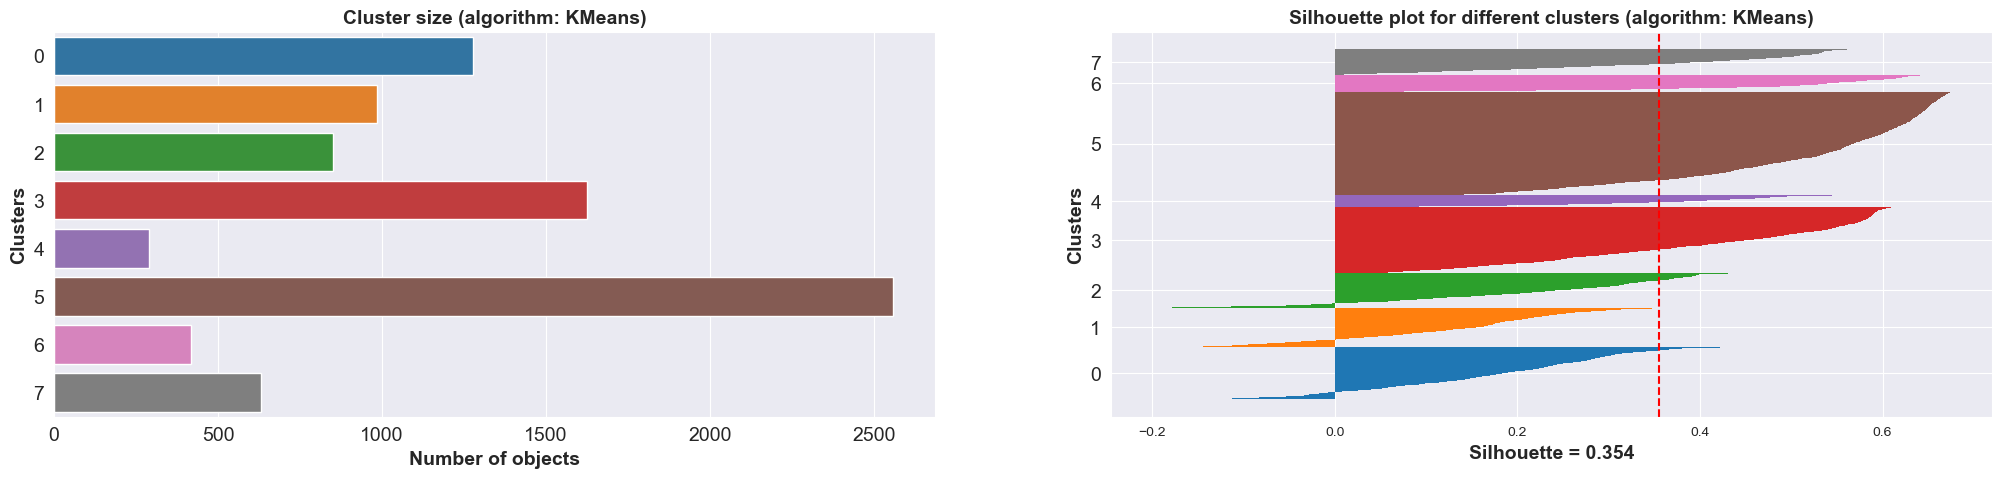

****************************************************************************************************************


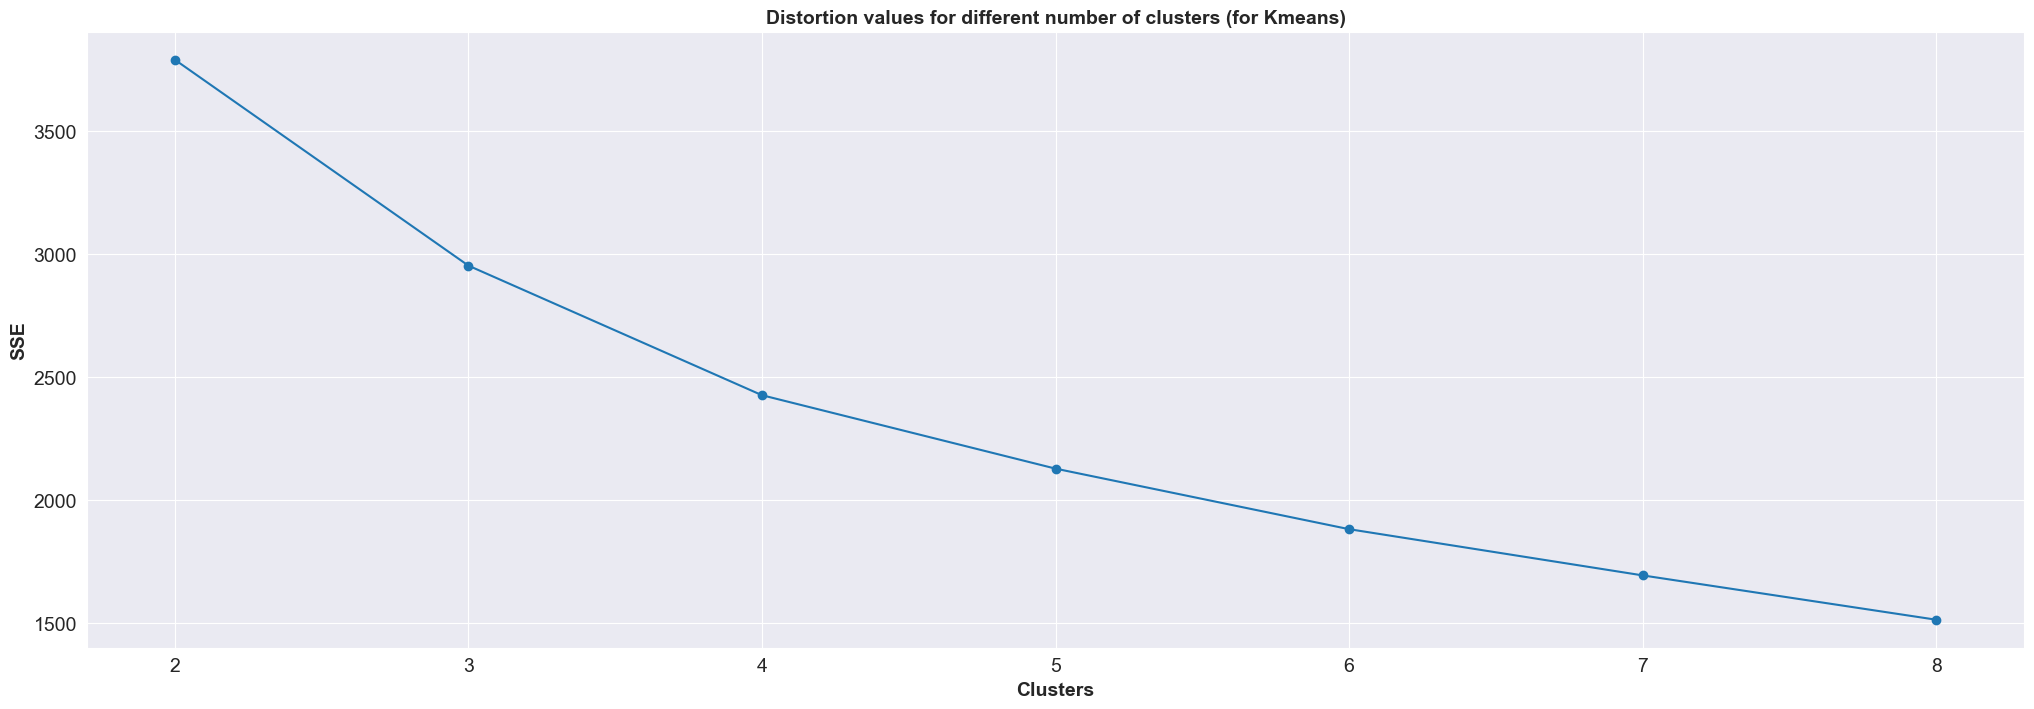

****************************************************************************************************************


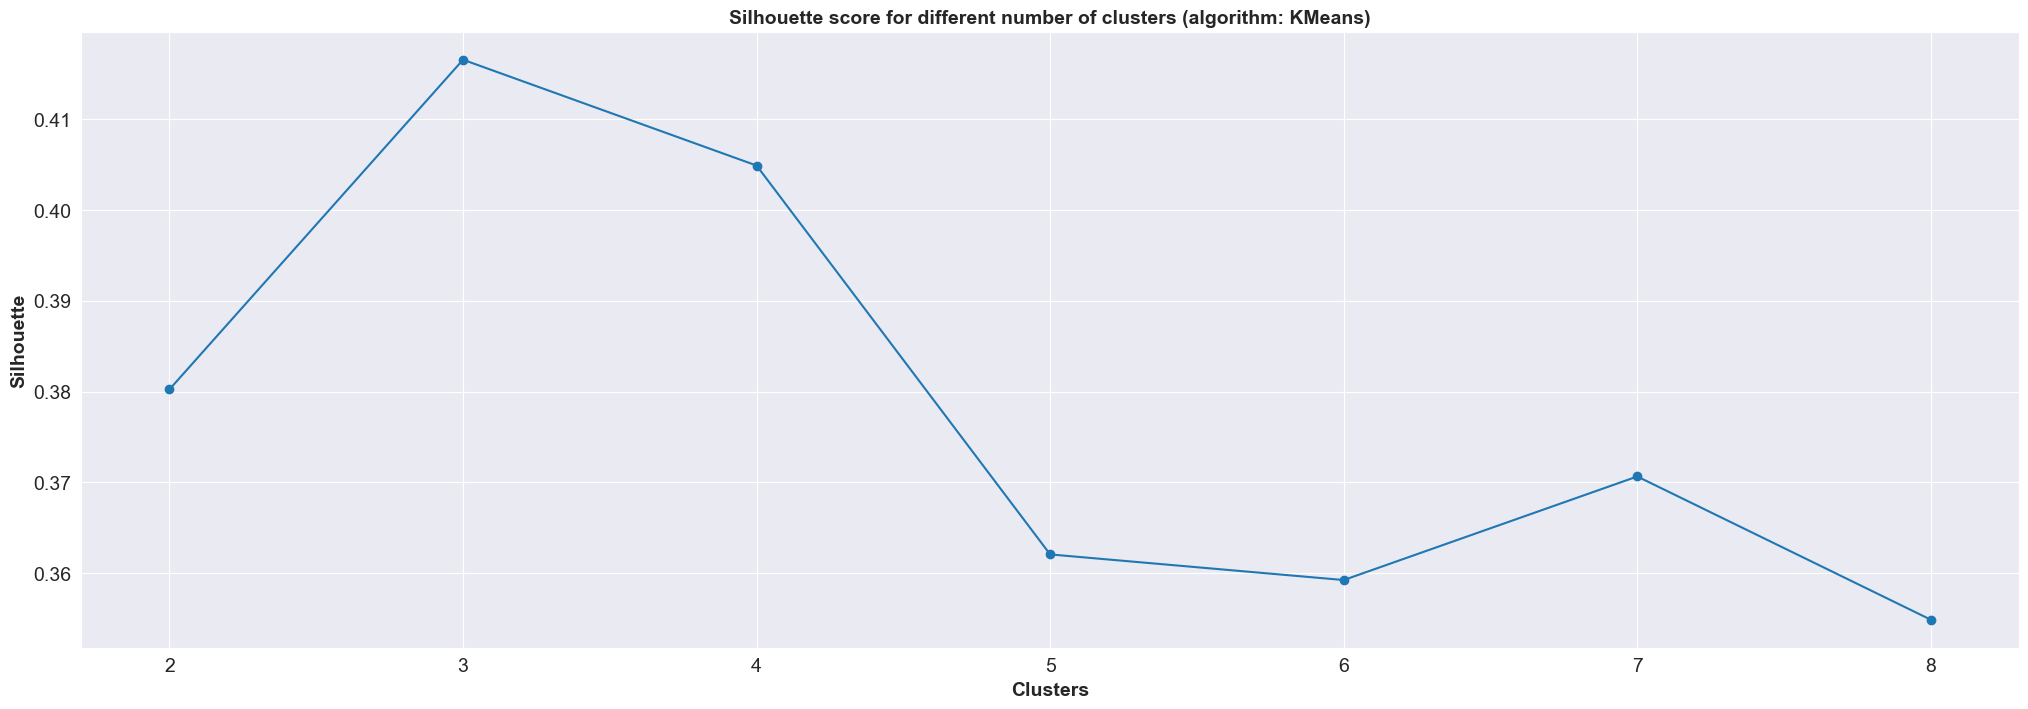

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


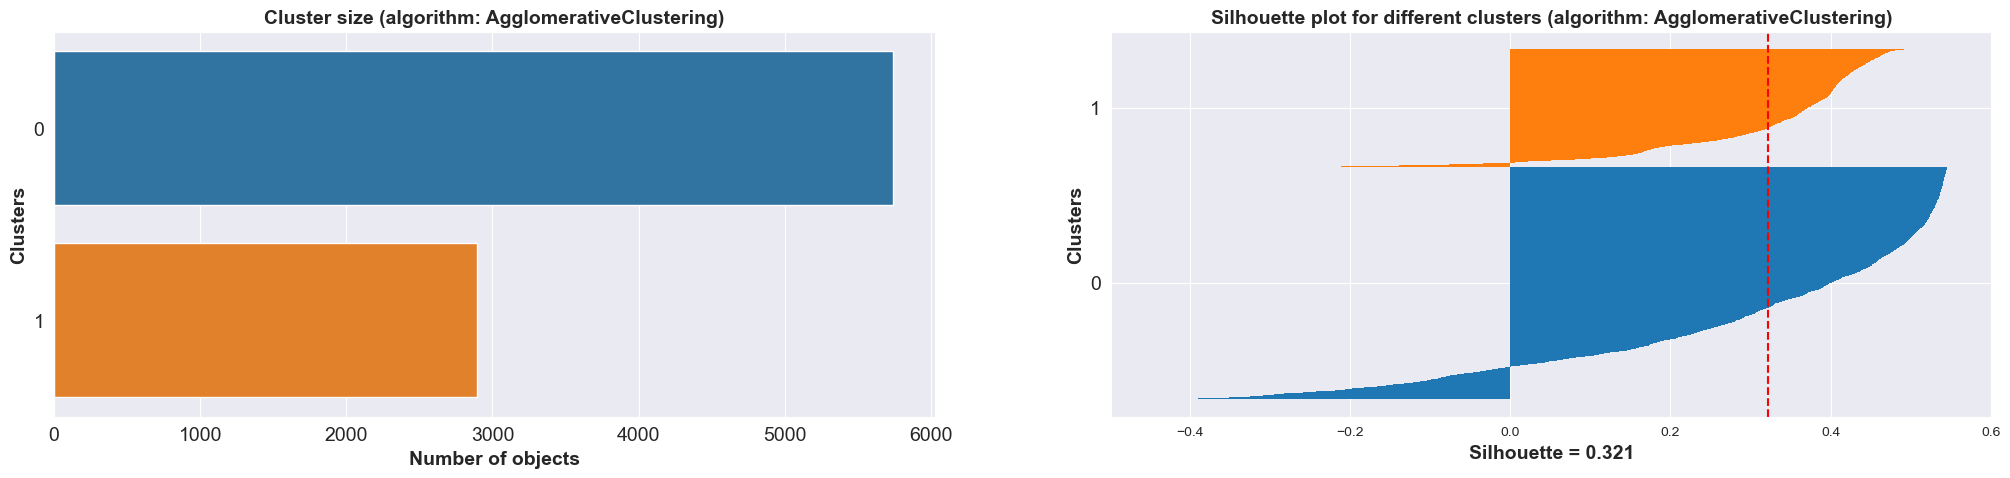

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


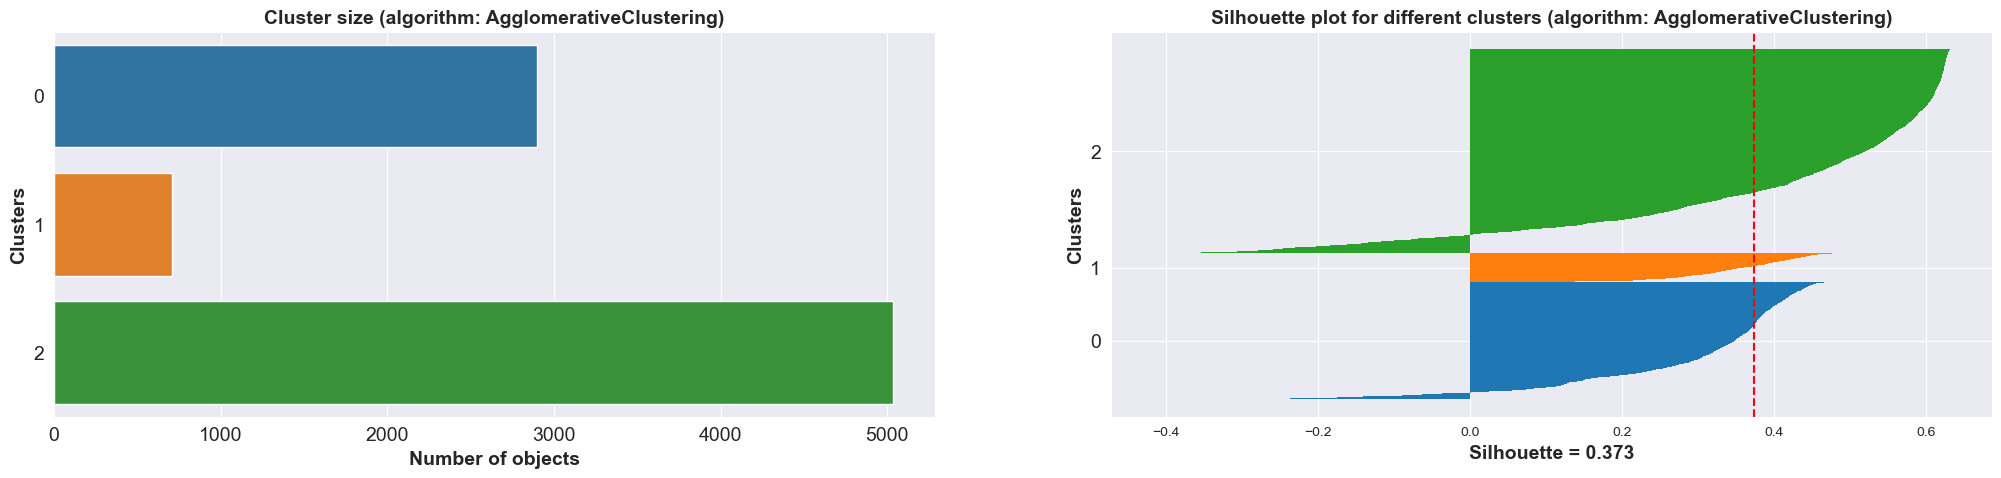

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


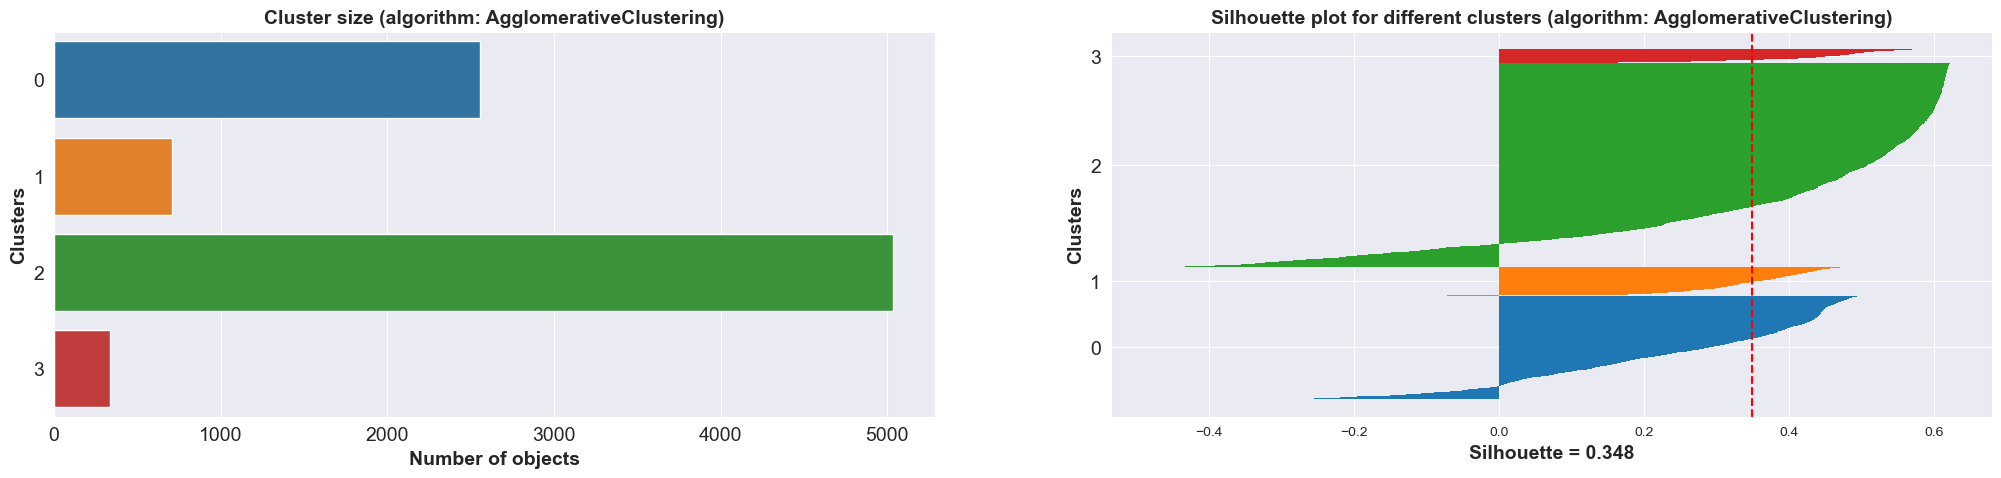

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


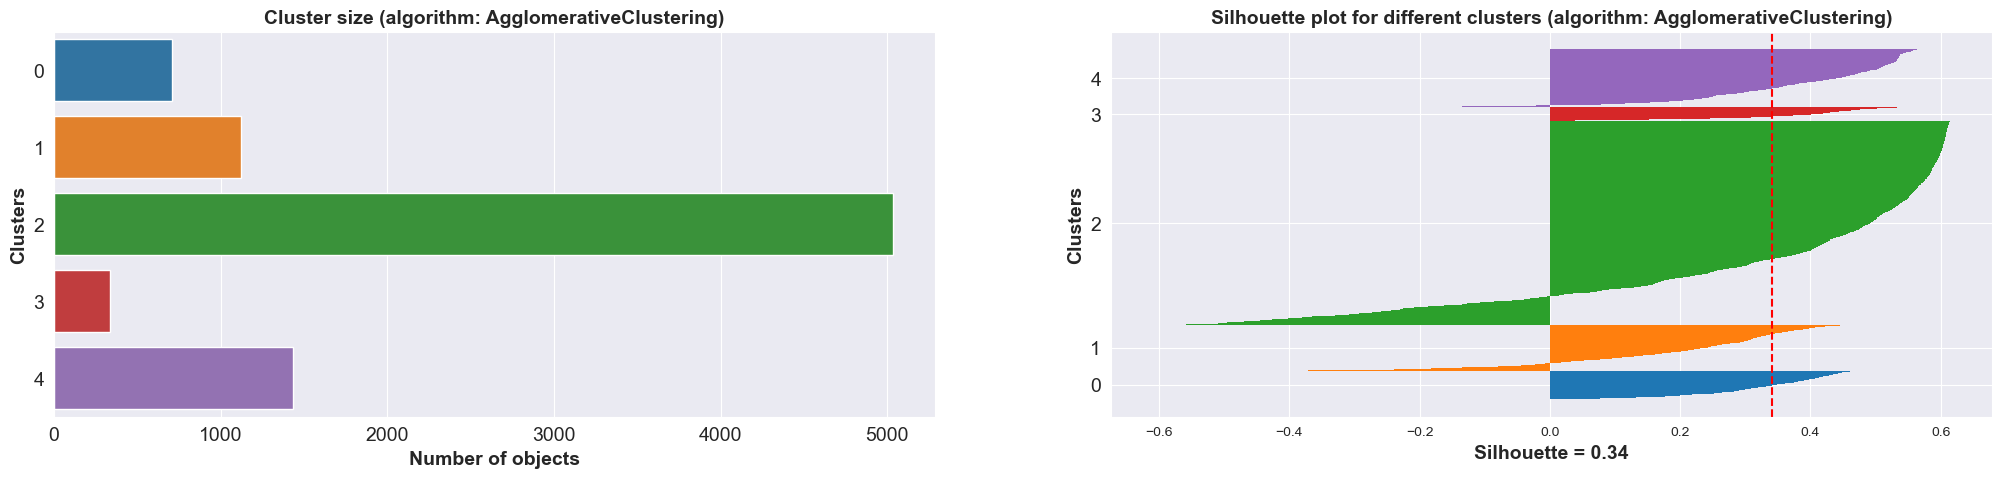

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


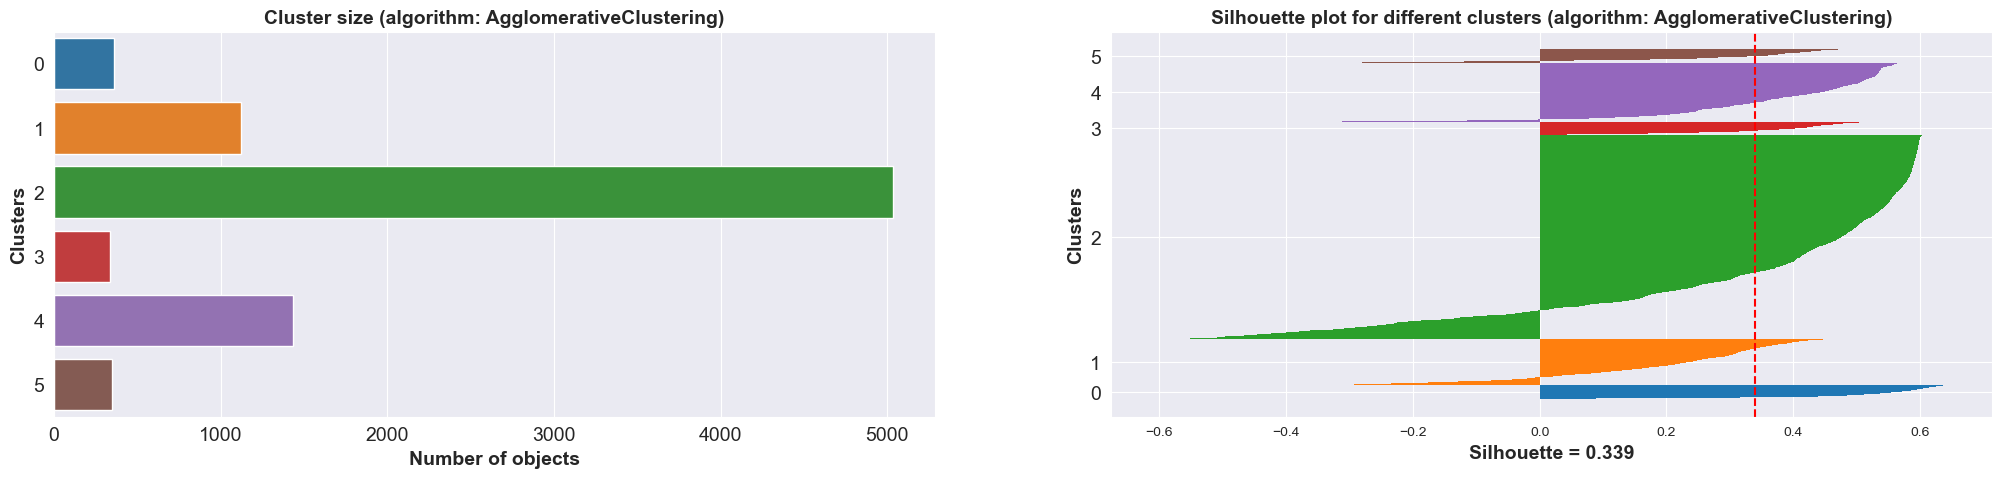

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


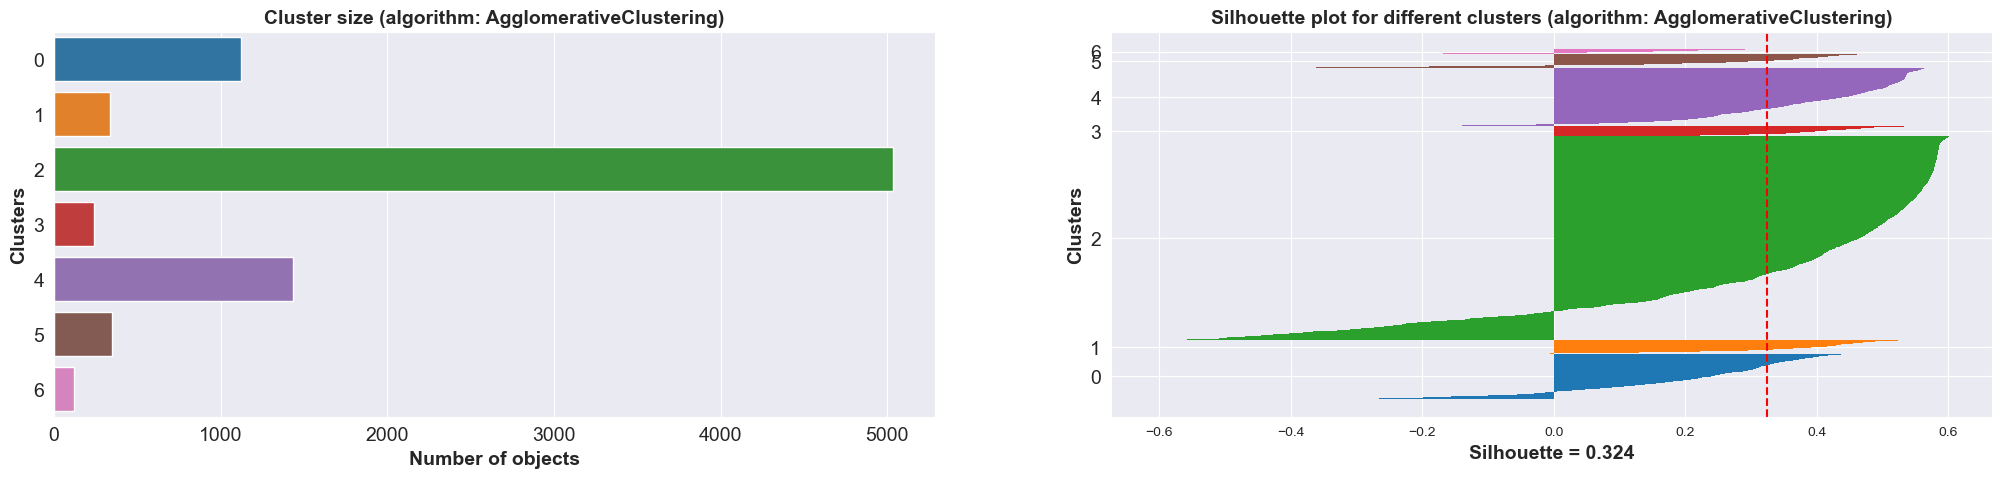

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


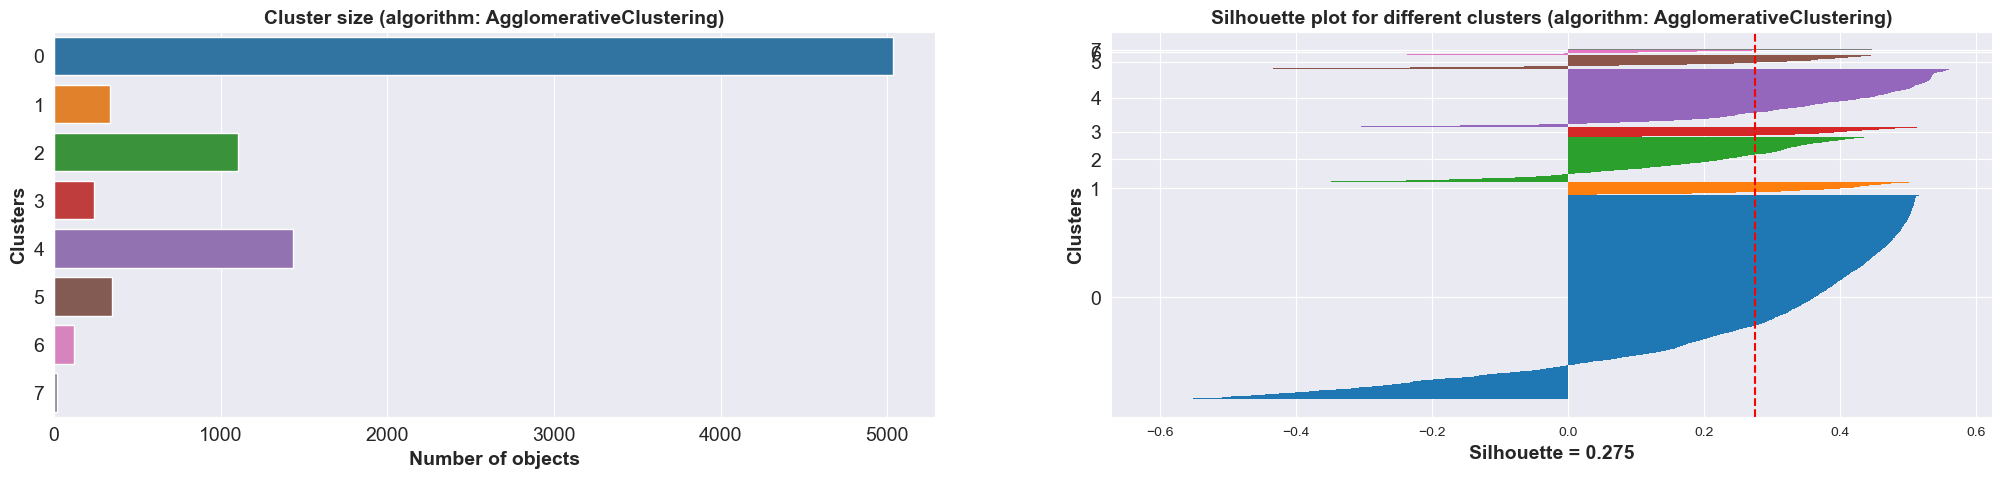

****************************************************************************************************************


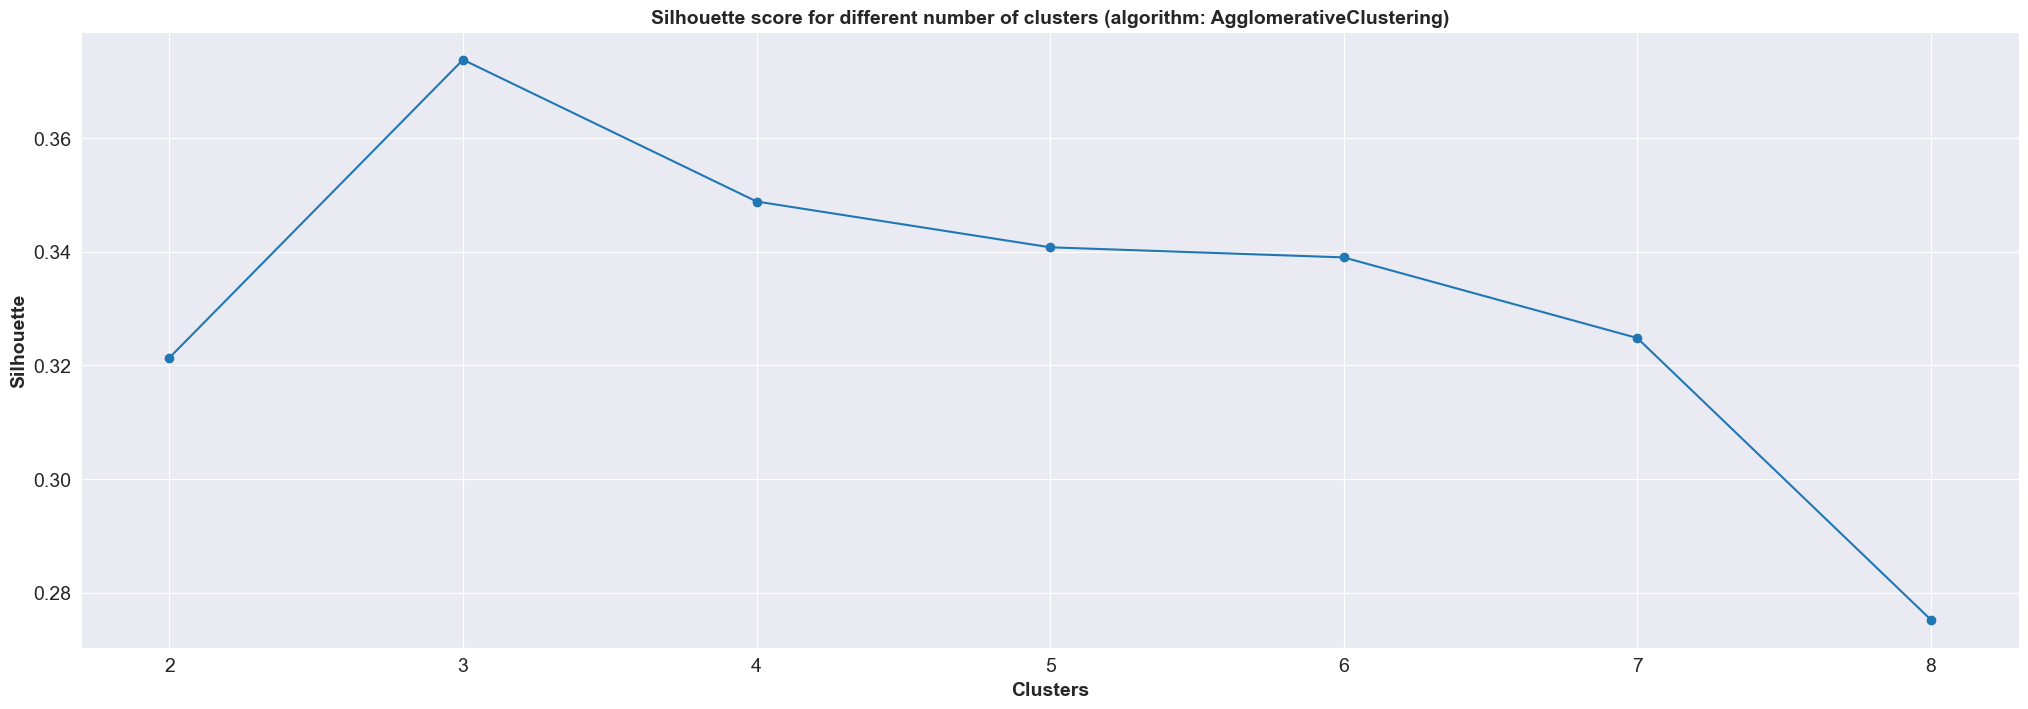

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


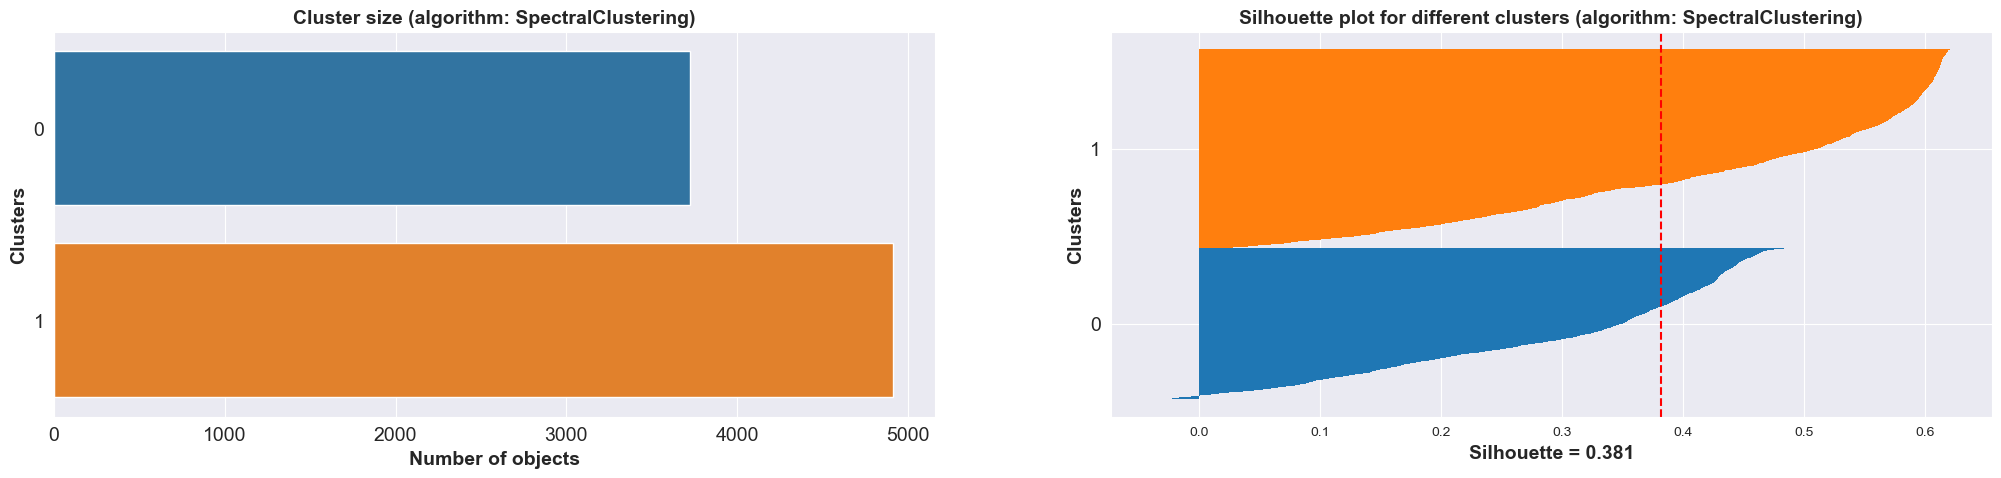

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


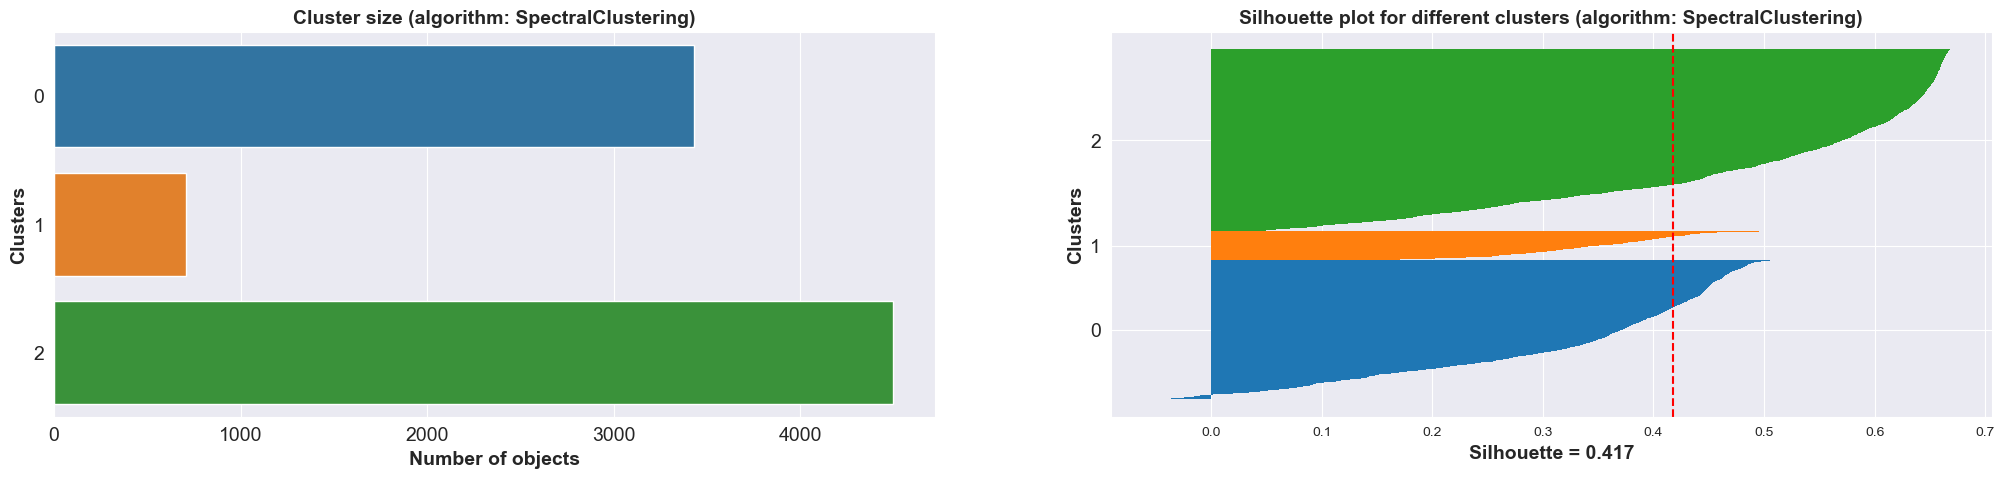

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


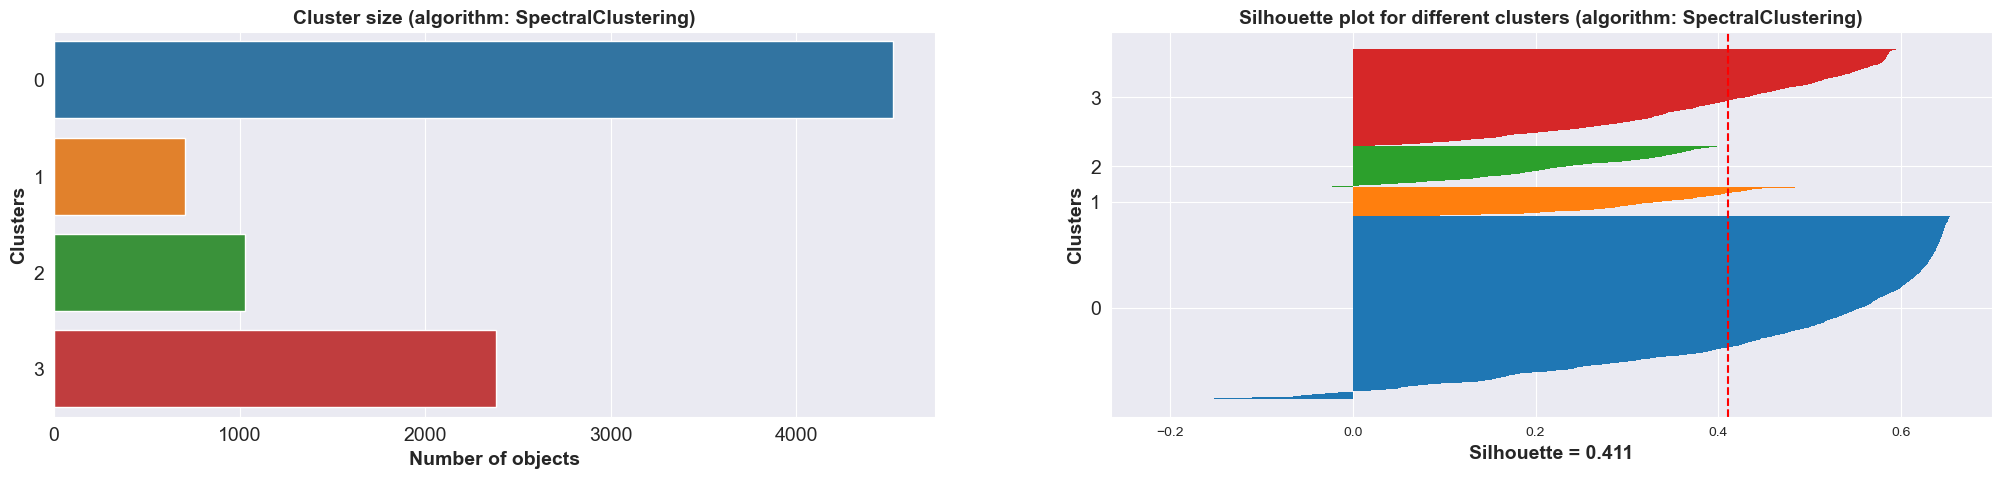

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


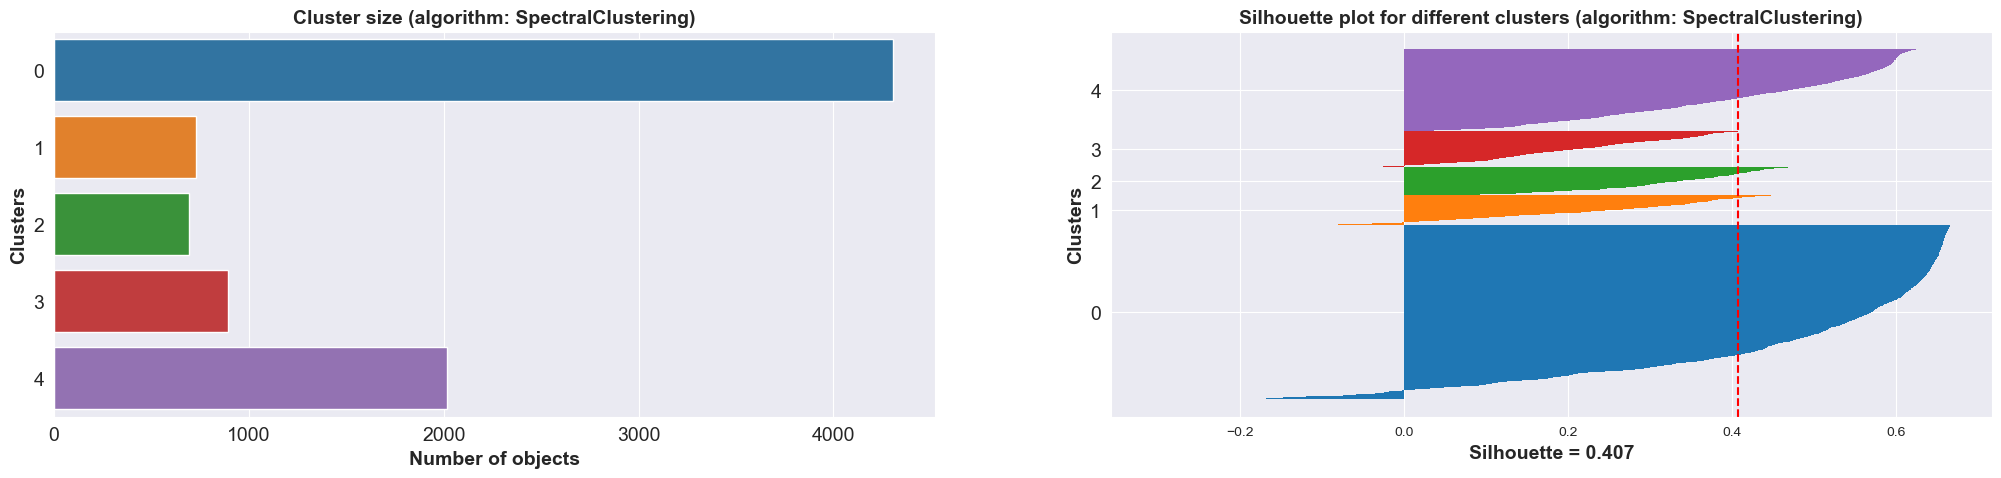

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


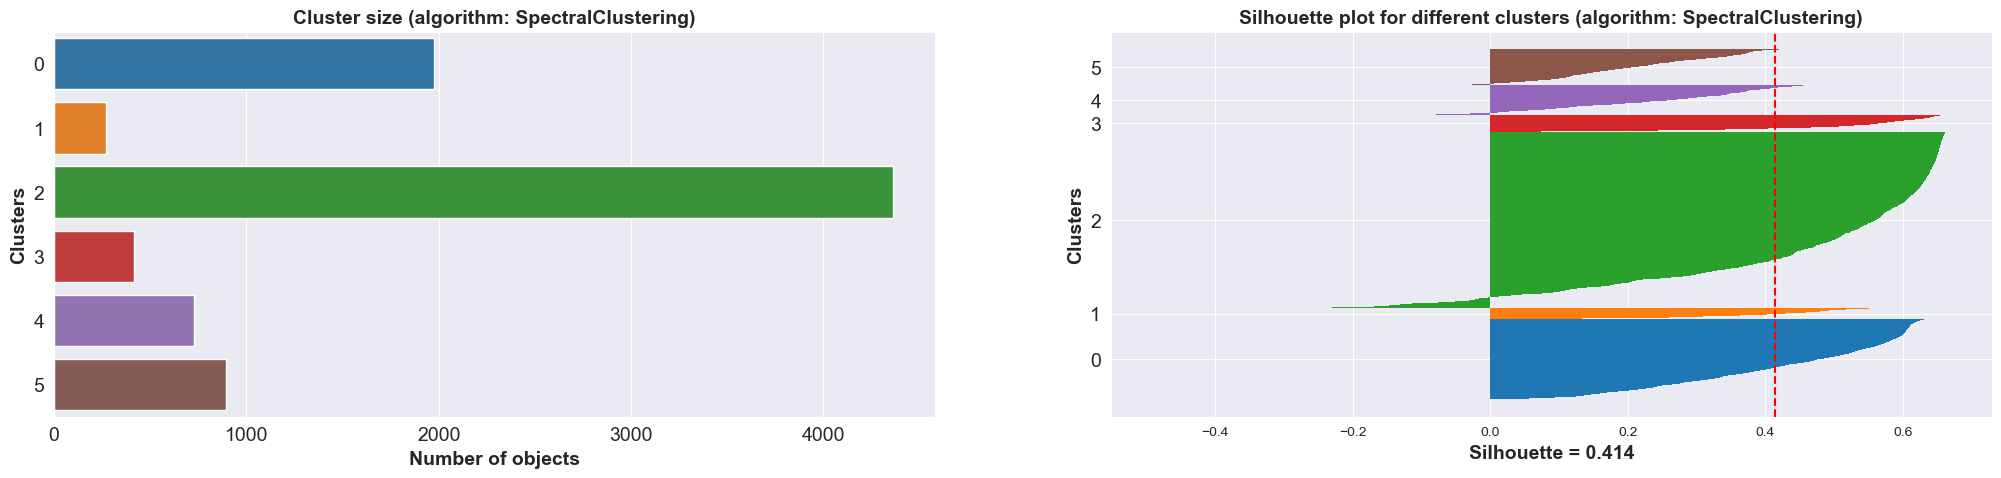

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


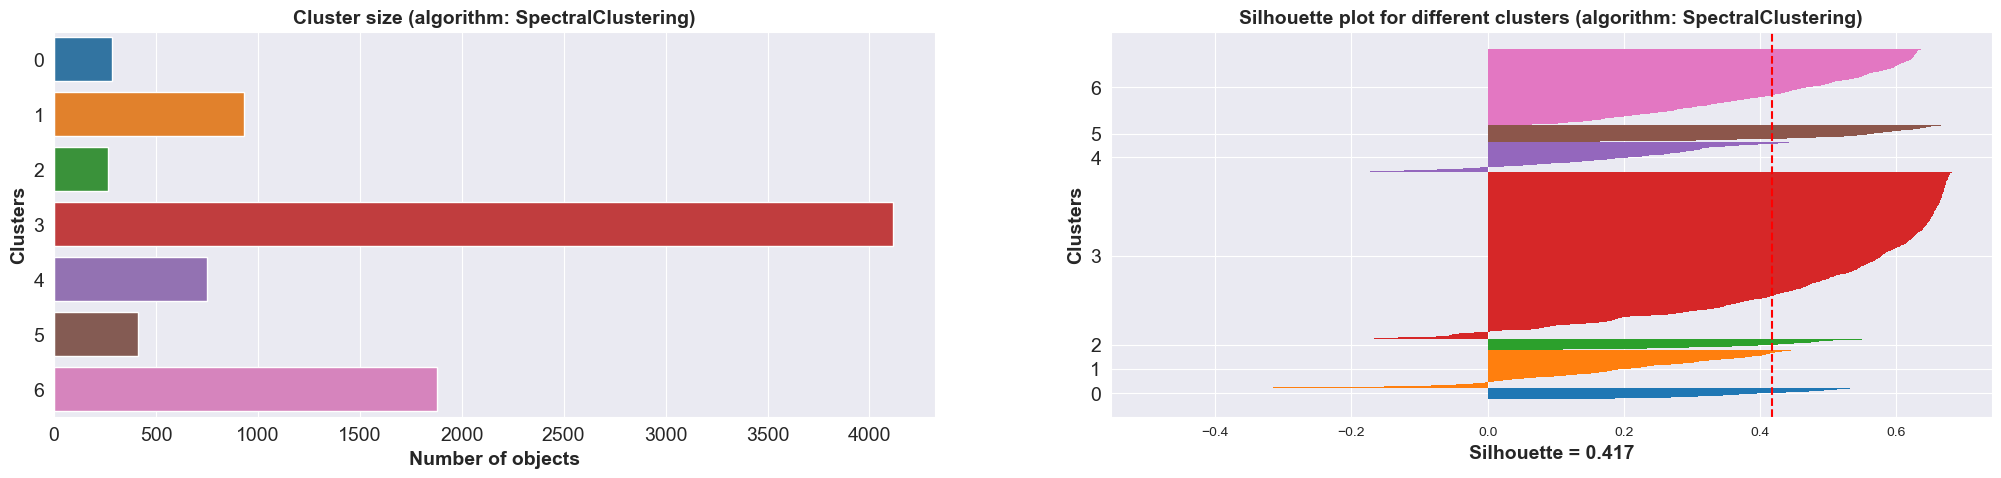

****************************************************************************************************************


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


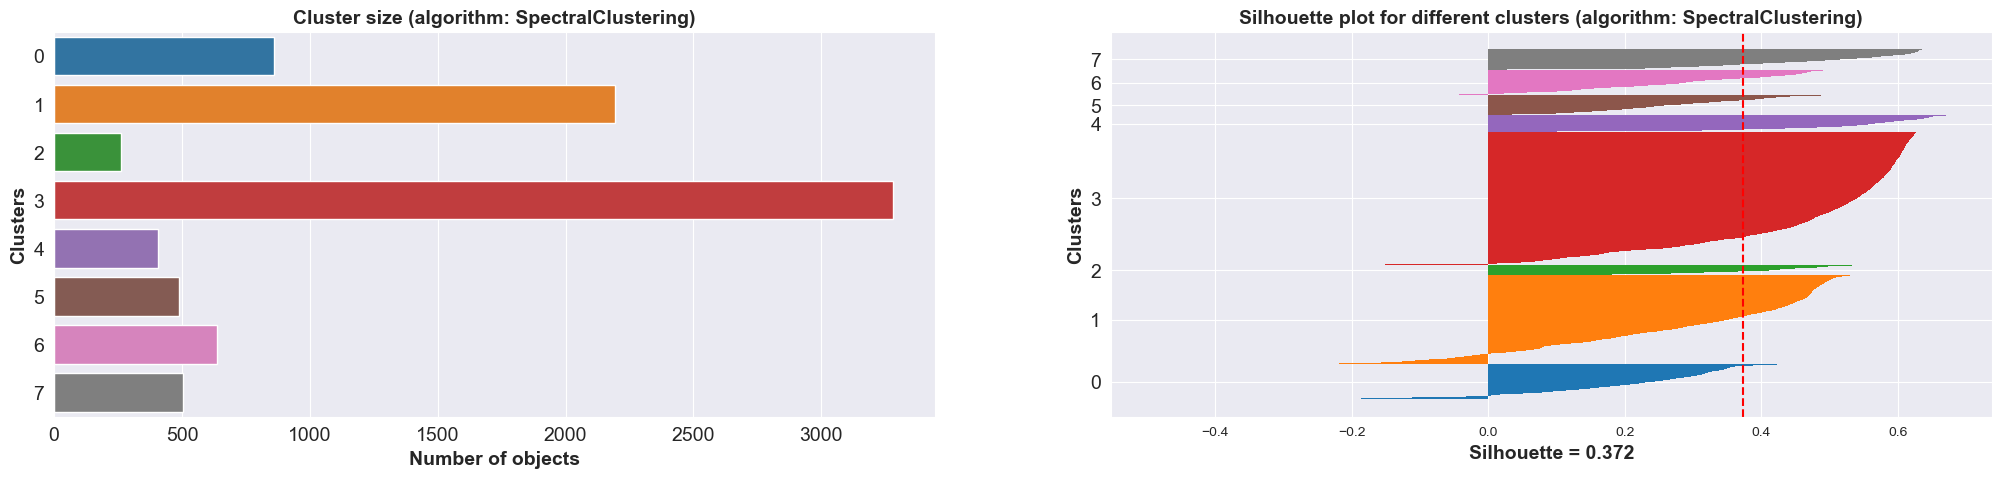

****************************************************************************************************************


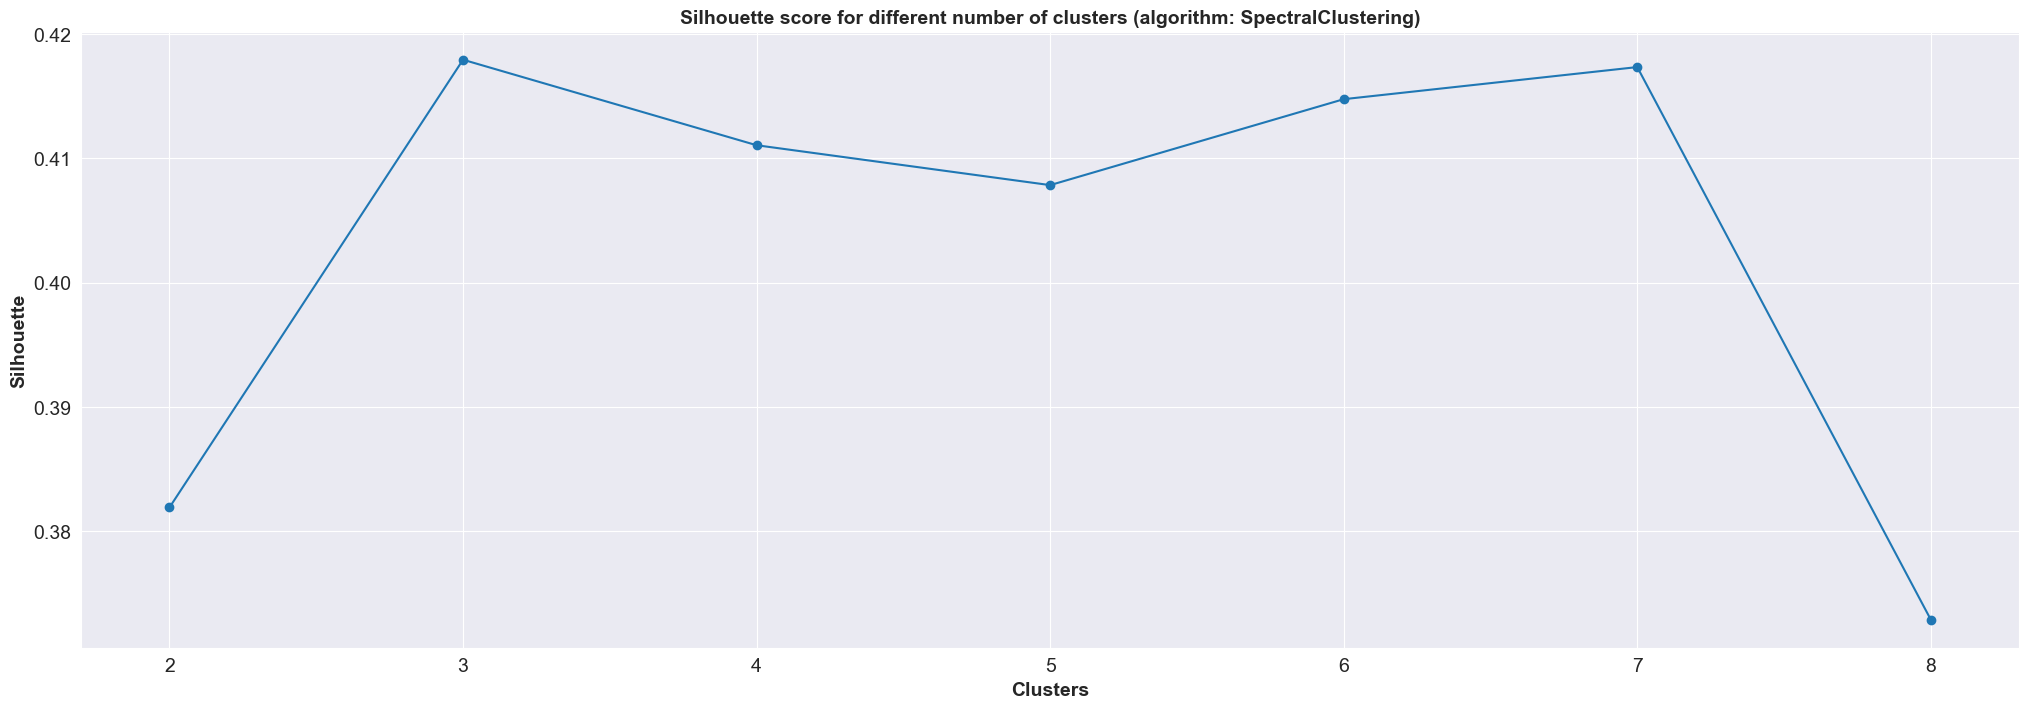

****************************************************************************************************************


In [8]:
class Clustering:
    algorithms = ['KMeans', 'AgglomerativeClustering', 'SpectralClustering']
    min_n_clusters = 2
    max_n_clusters = 8
    kmeans_distortions = []  # Model distortions for different hyperparameters(n_clusters) 
    
    @staticmethod
    def sse_plot(): 
        """Graphs for the SSE values (KMeans)"""
        plt.figure(figsize=(25, 8))
        sns.set_style("darkgrid")
        plt.title('Distortion values for different number of clusters (for Kmeans)', fontsize=14, fontweight='bold')
        plt.xlabel('Clusters', fontsize=14, fontweight='bold')
        plt.ylabel('SSE',fontsize=14, fontweight='bold')
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.plot(list(range(Clustering.min_n_clusters, Clustering.max_n_clusters + 1)), Clustering.kmeans_distortions, marker='o')
        plt.show()
        
    
    @staticmethod
    def silhouette_result(metrics_score:list, algorithm: str):
        plt.figure(figsize=(25, 8))
        sns.set_style("darkgrid")
        plt.title(f'Silhouette score for different number of clusters (algorithm: {algorithm})', fontsize=14, fontweight='bold')
        plt.xlabel('Clusters', fontsize=14, fontweight='bold')
        plt.ylabel('Silhouette', fontsize=14, fontweight='bold')
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.plot(list(range(Clustering.min_n_clusters, Clustering.max_n_clusters + 1)), metrics_score, marker='o')
        plt.show()
        print('*' * 112)
    
          
    def make_models(self, data_old: pd.DataFrame, data_modified: pd.DataFrame):  
        """Method for creating models"""
        for algorithm in Clustering.algorithms:  
            metrics = []  # metrics: silhouette score
            for n_clusters in range(Clustering.min_n_clusters, Clustering.max_n_clusters + 1):  
                if algorithm == 'AgglomerativeClustering':
                    ac = AgglomerativeClustering(n_clusters=n_clusters,
                                                linkage='complete')
                    pred = ac.fit_predict(data_transform)
                    labels = pd.DataFrame(pred, columns =['Labels'], index=data.index)
                    metrics.append(silhouette_score(data_transform, labels))
                    Clustering.object_plot(labels, pred, algorithm)
                    
                if algorithm == 'SpectralClustering':
                    sc = SpectralClustering(n_clusters=n_clusters)
                    pred = sc.fit_predict(data_transform)
                    labels = pd.DataFrame(pred, columns =['Labels'], index=data.index)
                    metrics.append(silhouette_score(data_transform, labels))
                    Clustering.object_plot(labels, pred, algorithm)
                                              
                if algorithm == 'KMeans':  
                    kmeans = KMeans(n_clusters=n_clusters, 
                                    init="k-means++", 
                                    n_init=10,
                                    max_iter=280, 
                                    random_state=42)
                    pred = kmeans.fit_predict(data_transform) 
                    labels = pd.DataFrame(pred, columns=['Labels'], index=data.index)
                    metrics.append(silhouette_score(data_transform, labels))
                    Clustering.kmeans_distortions.append(kmeans.inertia_)  
                    Clustering.object_plot(labels, pred, algorithm)
                        
            if algorithm == 'KMeans':
                Clustering.sse_plot()
                print('*' * 112)
                    
            Clustering.silhouette_result(metrics, algorithm)
                                     
                        
    @staticmethod
    def object_plot(labs: pd.DataFrame, predict:np.array, algorithm:str):  # здесь cтроим графики кол-ва объектов в кластере и силуэтного скора для модели 
        """Graphs of the number of objects in a cluster and the silhouette coefficient"""
        cluster_group = labs.groupby('Labels').size()
        plt.figure(figsize=(25, 5))
        plt.subplot(1, 2, 1)
        sns.set_style("darkgrid")
        plt.title(f'Cluster size (algorithm: {algorithm})', fontsize=14, fontweight='bold')
        sns.barplot(x=cluster_group.values, y=list(map(str, cluster_group.index)))
        plt.xlabel('Number of objects', fontsize=14, fontweight='bold')
        plt.ylabel('Сlusters', fontsize=14, fontweight='bold')
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
                
        plt.subplot(1, 2, 2)         
        cluster_labels = np.unique(predict)
        silhouette_vals = silhouette_samples(data_transform, predict, metric='euclidean')
        y_ax_lower, y_ax_upper = 0, 0
        yticks = []
        for i, с in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[predict == с]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            plt.barh(range(y_ax_lower, y_ax_upper),
                   c_silhouette_vals,
                   height = 1,
                   edgecolor='none')

            yticks.append((y_ax_lower + y_ax_upper) / 2)
            y_ax_lower += len(c_silhouette_vals) 
        silhouette_avg = np.mean(silhouette_vals)
        plt.axvline(silhouette_avg, color="red", linestyle="--")
        sns.set_style("darkgrid")
        plt.title(f'Silhouette plot for different clusters (algorithm: {algorithm})', fontsize=14, fontweight='bold')   
        val = float(''.join([i for i in str(silhouette_avg)][0:5]))
        plt.xlabel(f'Silhouette = {val}', fontsize=14, fontweight='bold')
        plt.ylabel('Clusters', fontsize=14, fontweight='bold')
        plt.yticks(yticks, cluster_labels, fontsize=14)
        plt.show()
        print('*' * 112)
                                                 

clustering = Clustering()
clustering.make_models(data, data_transform)

In [9]:
best_model = AgglomerativeClustering(n_clusters=3)
labels = pd.DataFrame(best_model.fit_predict(data_transform), columns=['Clusters'], index=data.index)
data = pd.concat([data, labels], axis=1)

In [10]:
# object_cols = ['Education', 'Kidhome', 'Teenhome', 'Family_Size', 'Alone', 'Partner']
del data["OG"] # omit OG column
num_cols = list(data.columns)

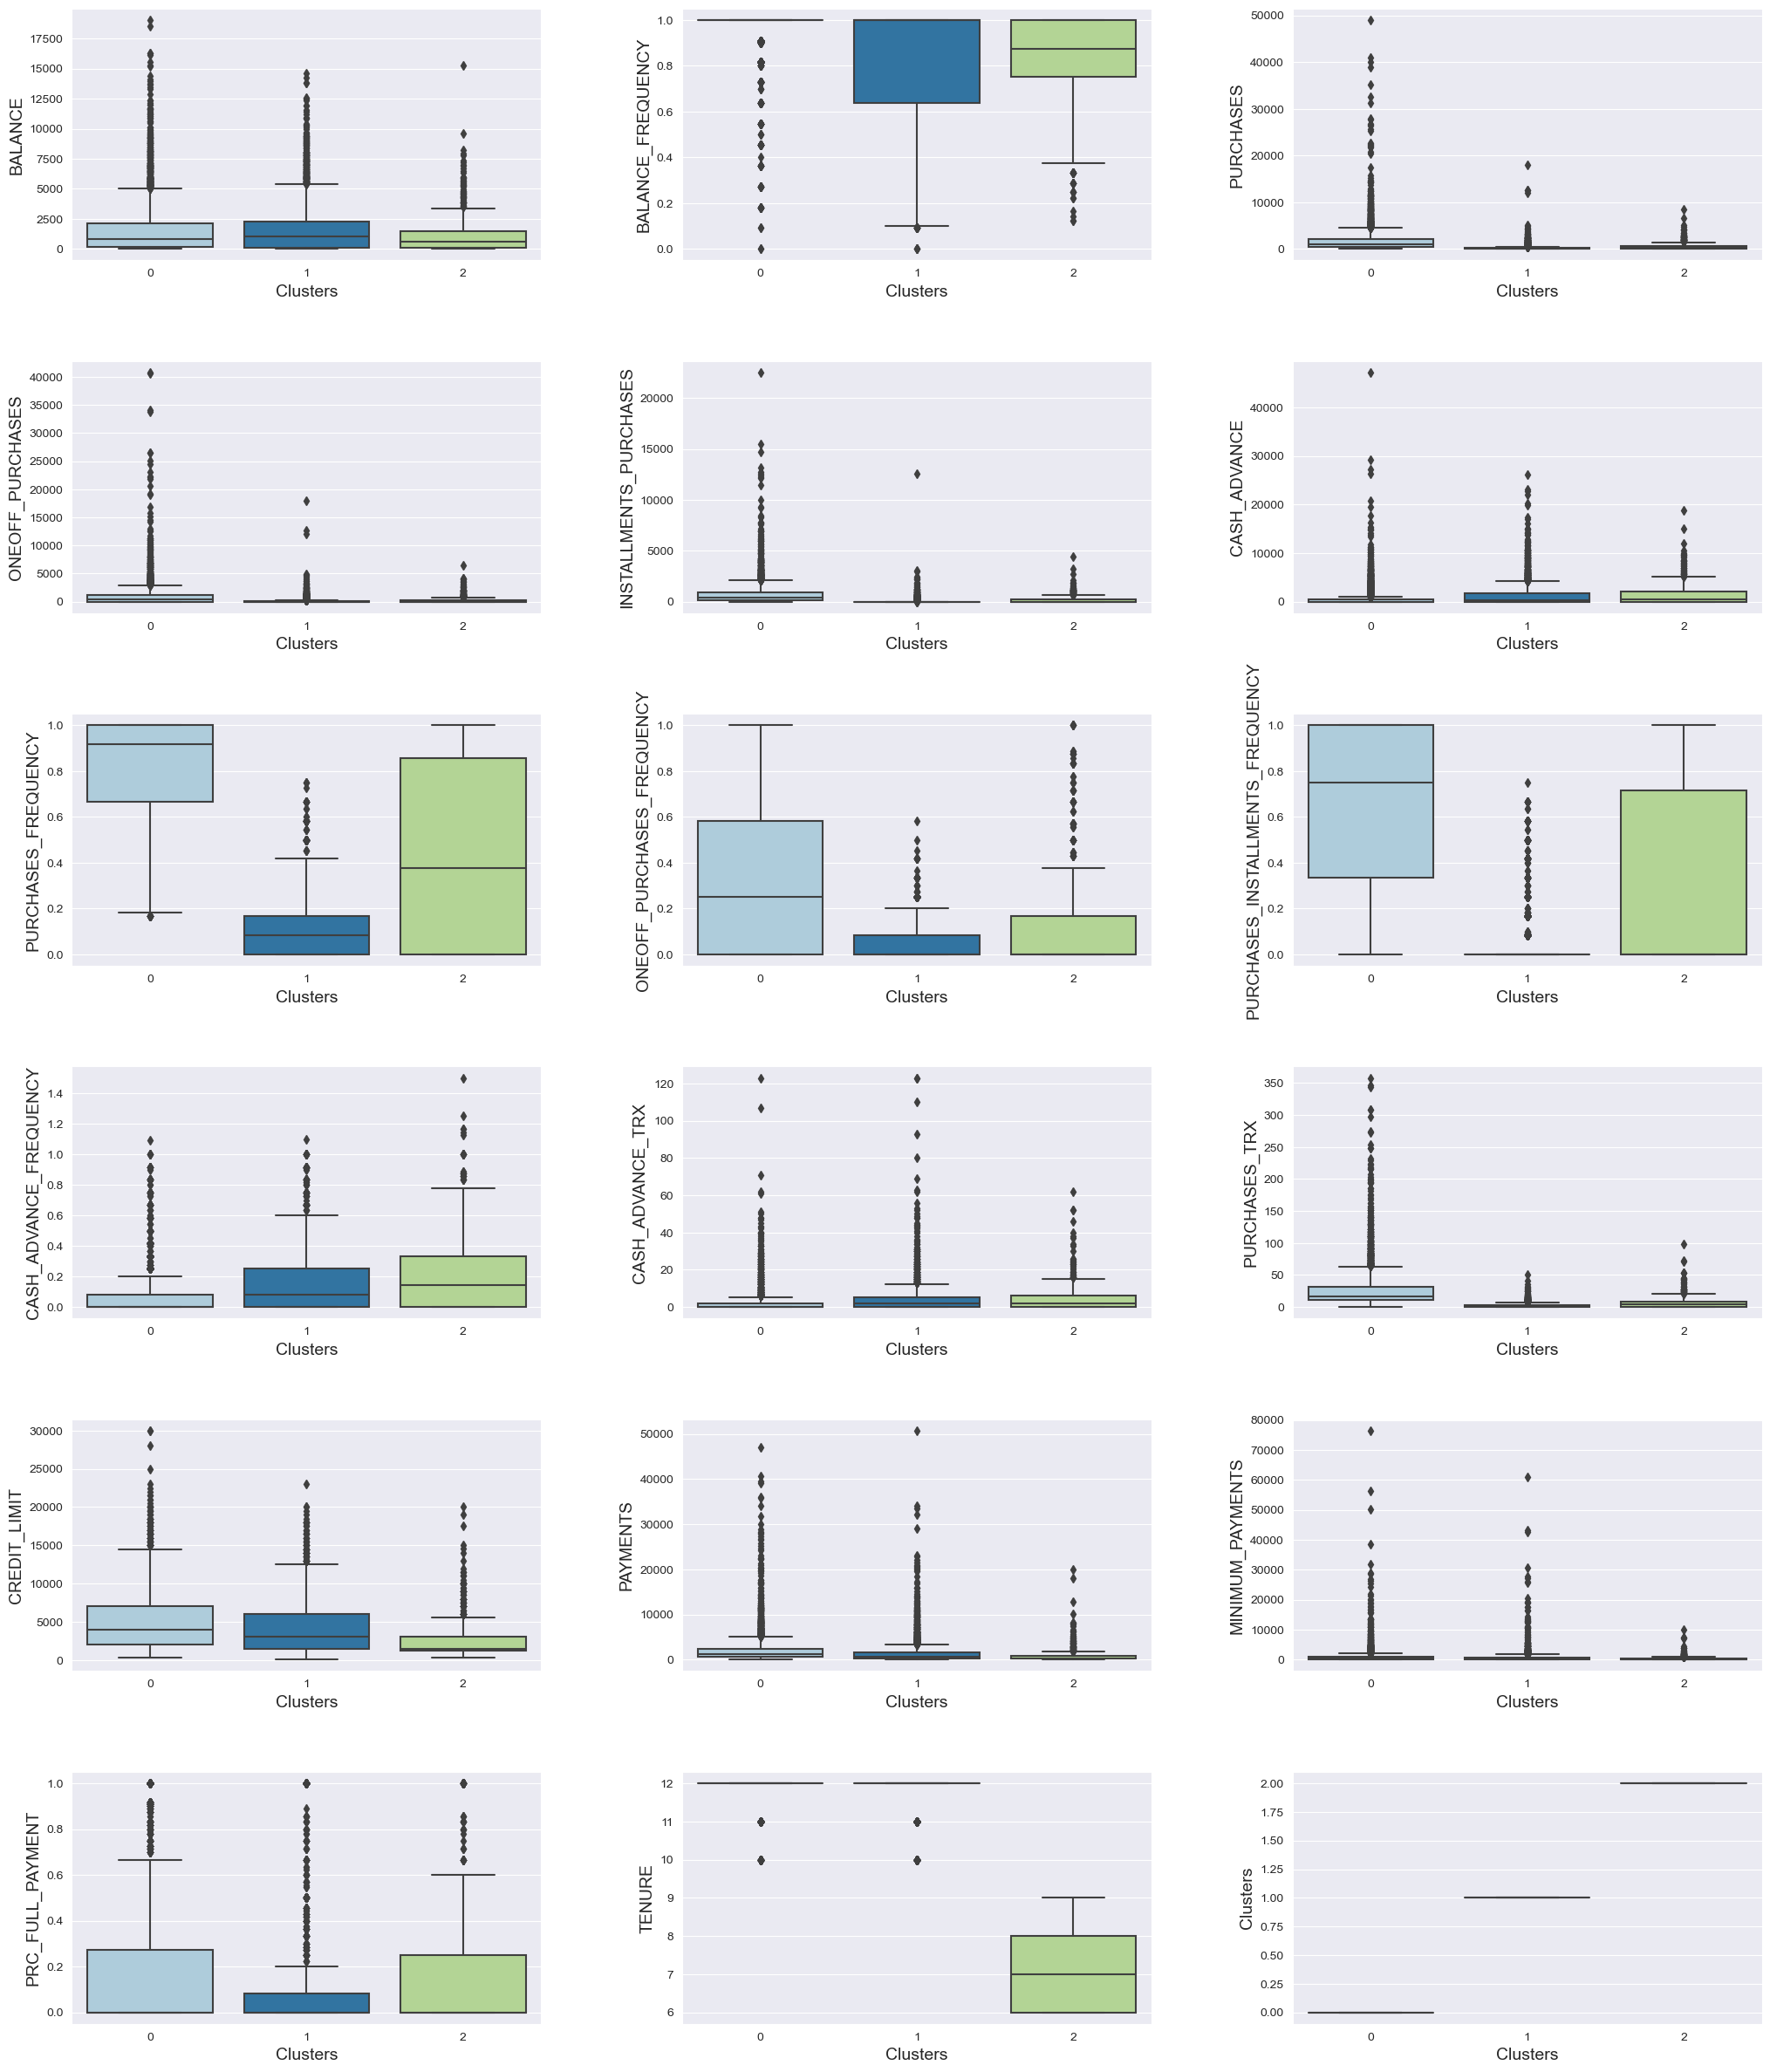

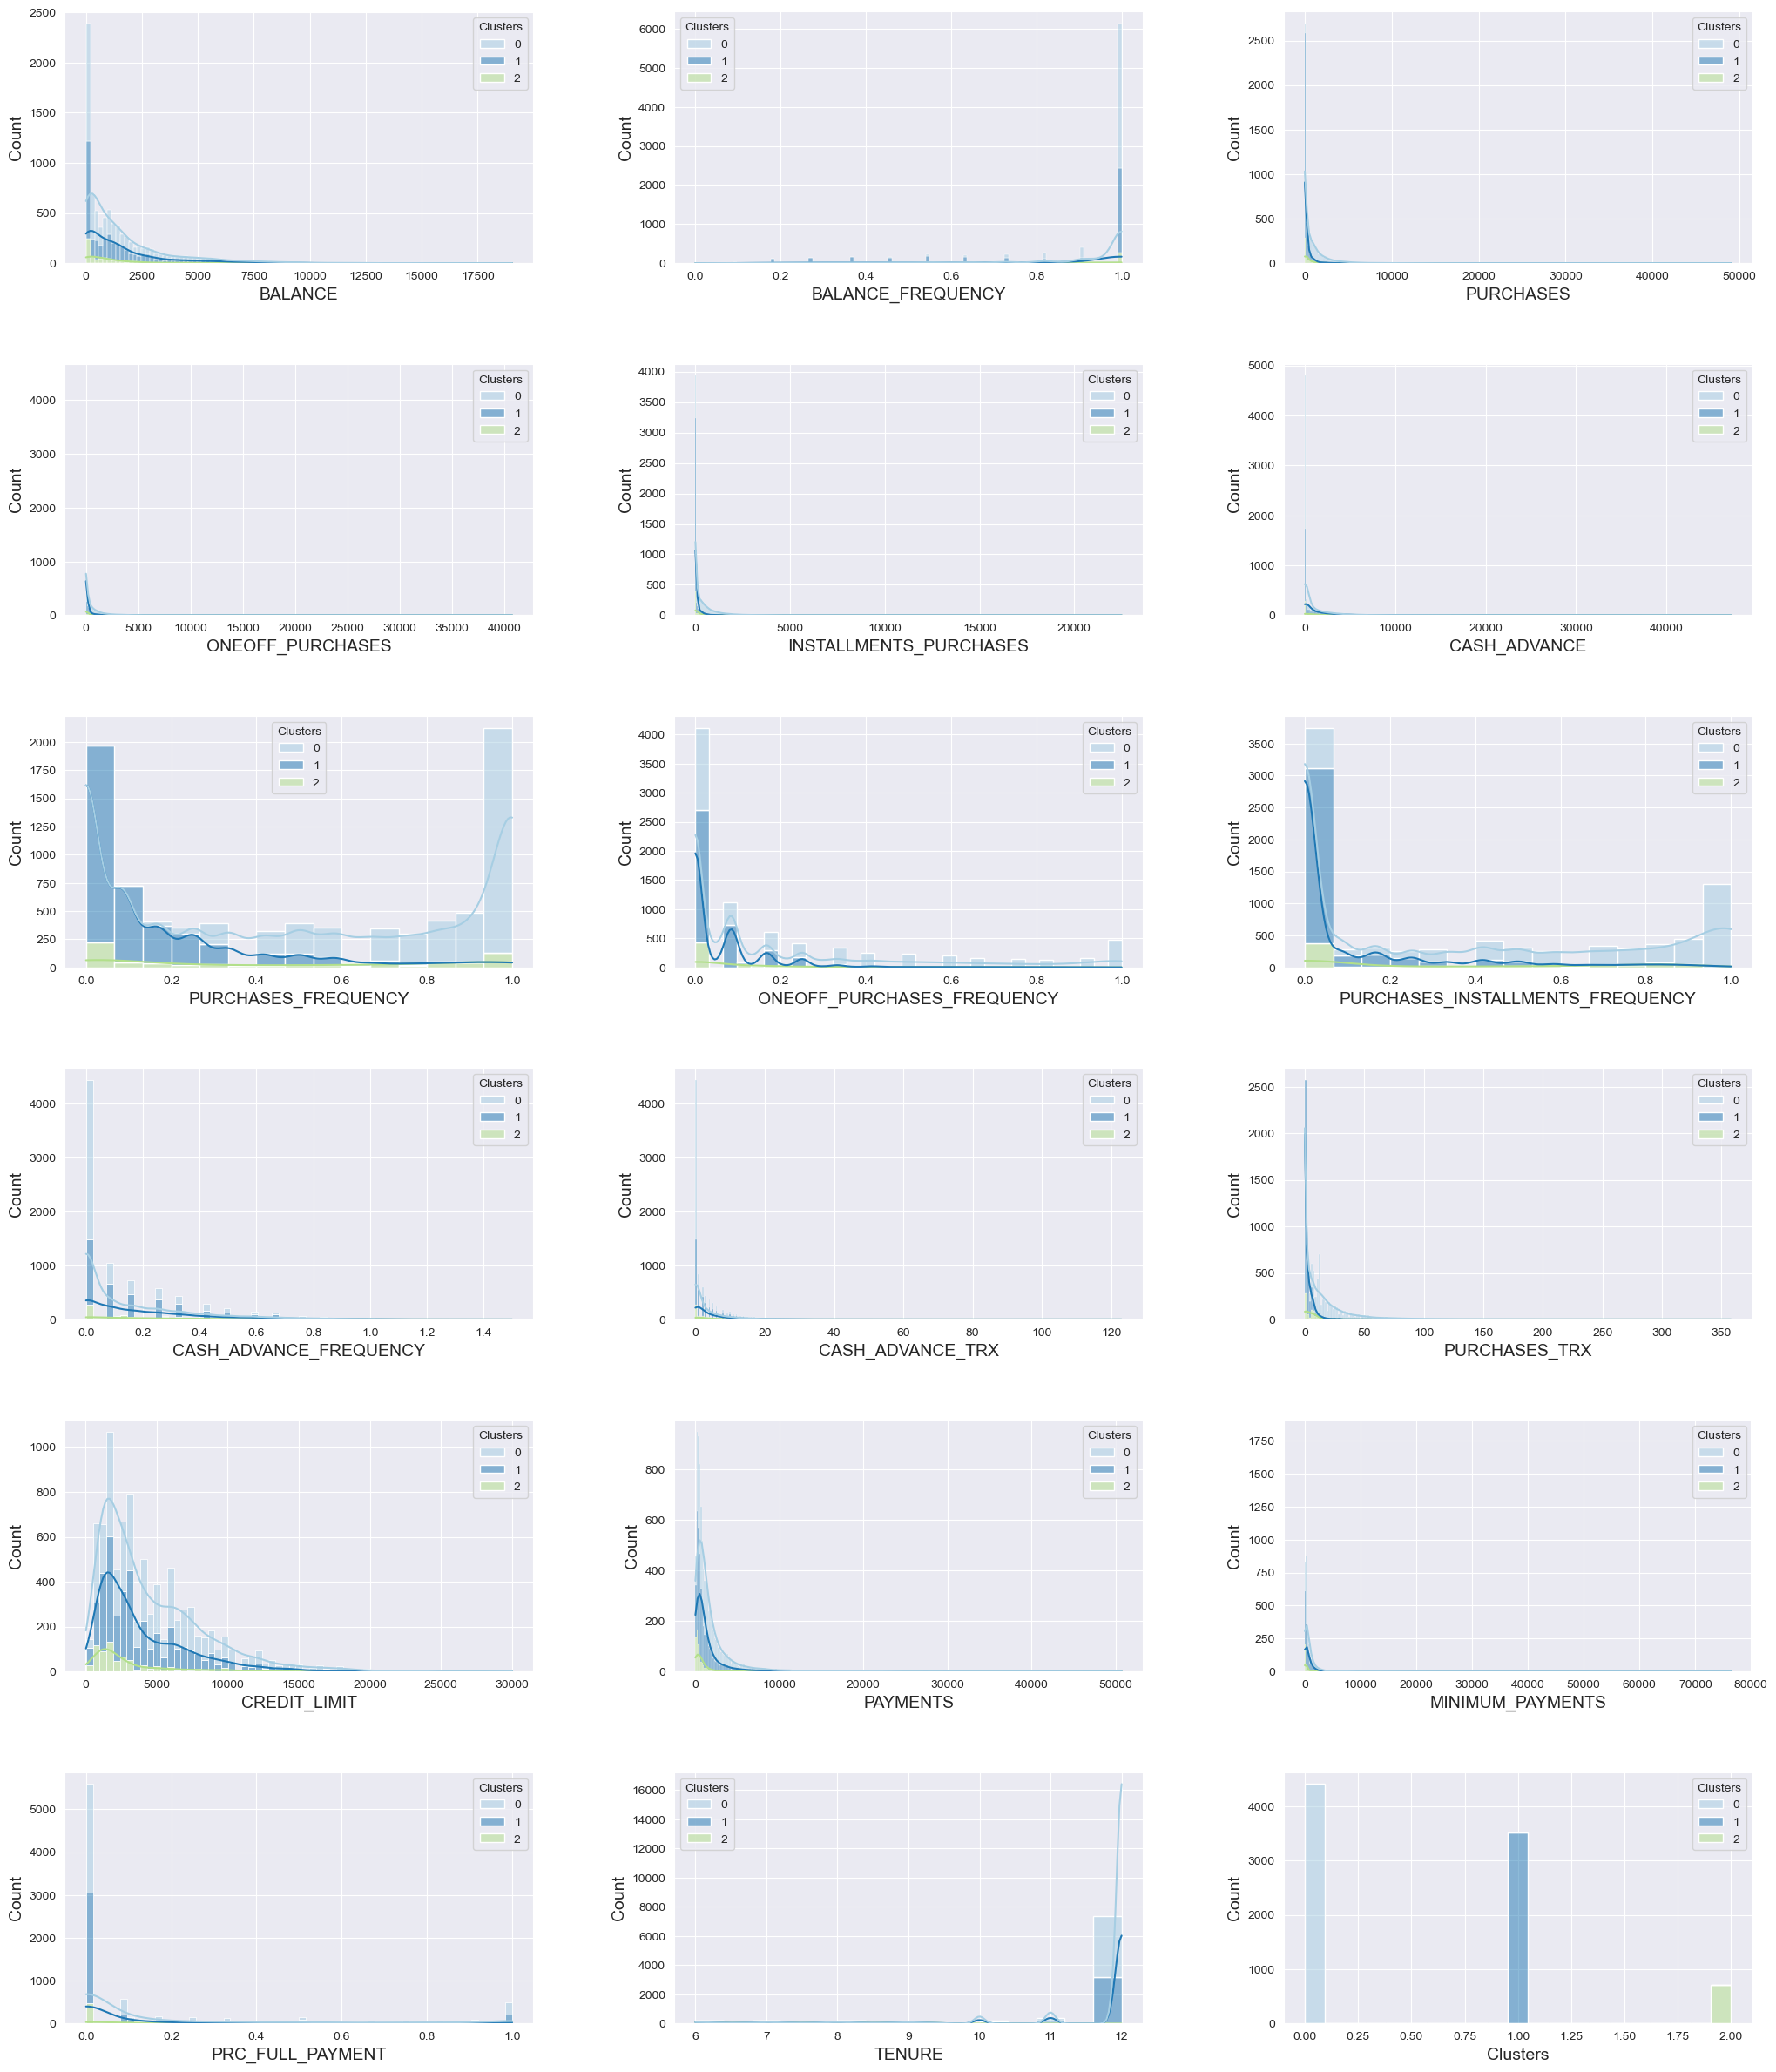

In [11]:
warnings.filterwarnings('ignore')  # ignore notifications

def graph_builder():
    """Graphs of the main characteristics for features int | float for the best models.
    The best model was chosen based on the results of the graphs"""
    def boxplot():
        n_cols = len(num_cols)
        rows = n_cols // 3 
        _, axes = plt.subplots(ncols=3, nrows=rows, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(num_cols):
            b = sns.boxplot(data=data,y=col,x="Clusters",palette="Paired",ax=axes.reshape(-1)[num])
            b.set_xlabel('Clusters', fontsize=14)
            b.set_ylabel(f'{data[col].name}', fontsize=14)
            sns.set_style('darkgrid')
    
    def histplot():    
        n_cols = len(num_cols)
        rows = n_cols // 3
        _, axes = plt.subplots(ncols=3, nrows=rows, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(num_cols):
            h = sns.histplot(data=data,x=col,hue="Clusters",multiple="stack",kde=True,palette="Paired",ax=axes.reshape(-1)[num])
            h.set_xlabel(f'{data[col].name}', fontsize=14)
            h.set_ylabel('Count', fontsize=14)
            sns.set_style('darkgrid')
            
    def barplot():
        n_cols = len(object_cols)
        rows = n_cols // 3 + n_cols % 3
        size_cluster = data.groupby("Clusters").count().iloc[:, 0]
        _, axes = plt.subplots(ncols=3, nrows=rows, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)    
        for num, col in enumerate(object_cols):
            data = (data.groupby(["Clusters"])[col].value_counts().unstack(fill_value=0).T)
            data = pd.DataFrame(data.unstack())
            data.columns = ["Number of objects"]
            data = data.reset_index()
            b= sns.barplot(data=data,x=data[col],hue=data.Clusters,y=data['Number of objects'],ax=axes.reshape(-1)[num])
            b.set_xlabel(f'{data[col].name}', fontsize=14)
            b.set_ylabel('Number of objects', fontsize=14)
            sns.set_style('darkgrid')
    
    boxplot()
    histplot()
    #barplot()
    
graph_builder()

## Conclusion
Contrary to the reference notebook we cannot plot histograms as we don't have categorial data. Concluding from graphs at hand we can say that, the three different classes to differ in certain characteristics:

+ Cluster 0:
    * High Purchase (with installments) Frequency
    * Median bank account is 1000\$
    * Median Credit Limit is 4000\$
    * Average Tenure is 12 years
    * Lowest cash advance frequency of customer groups


+ Cluster 1:
    * Very low Purchase Frequency
    * Median bank account is 1100\$
    * Median Credit Limit is 3000\$
    * Middle cash advance frequency of customer groups
    * Average Tenure is 12 years



+ Cluster 2:
    * Doesn't purchase much
    * Median bank account is 600\$
    * Median Credit Limit is 2000\$
    * Average Tenure is 7 Years
    * Middle cash advance frequency of customer groups
